# Anamoly Detection-Fraud using groupKfold, LGBM Classifier

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
#Read the credit card data
credit = pd.read_csv('D:\Projects\Kaggle\Fraud Detection\creditcard.csv')

# Exploratory Data Analysis

In [4]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### There is no null values in the data and hence we dont need to spending time on data cleaning.

In [5]:
#Describe gives statistical information about all columns in the dataset
credit_dec = pd.DataFrame(credit.describe())

In [6]:
credit_dec.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
pd.DataFrame(data = [credit_dec.iloc[3,:], credit_dec.iloc[7,:]]).T

,min,max
Time,0.000000,172792.000000
V1,-56.407510,2.454930
V2,-72.715728,22.057729
V3,-48.325589,9.382558
V4,-5.683171,16.875344
V5,-113.743307,34.801666
V6,-26.160506,73.301626
V7,-43.557242,120.589494
V8,-73.216718,20.007208
V9,-13.434066,15.594995


The credit dataset has the following info:  
1) Time - seconds elapsed between each transaction and the first transaction in the dataset  
2) V1 to V28 - Features V1, V2, ... V28 are the principal components obtained with PCA  
3) Amount - transaction Amount  
4) Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.  

In [8]:
credit.shape

(284807, 31)

In [9]:
credit[['Class', 'Amount']].groupby(['Class'], as_index=False).count().sort_values(by='Class', ascending=True)

,Class,Amount
0,0,284315
1,1,492


Number of Fraud Txns:  492
Number of non-Fraud Txns:  284315


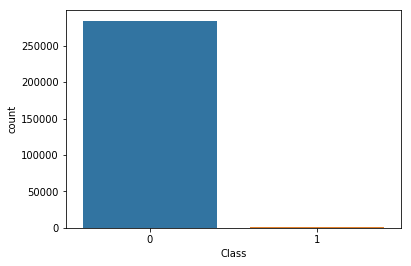

In [10]:
sns.countplot(data=credit, x = 'Class', label='Count')

NFraud, Fraud = len(credit[credit['Class']==0]), len(credit[credit['Class']==1])
print('Number of Fraud Txns: ', Fraud)
print('Number of non-Fraud Txns: ', NFraud)

In [11]:
print('Percentage of Fraudulent transactions:',Fraud/len(credit)*100,'%')
print('Percentage of non-fraudulent txns:', NFraud/len(credit)*100,'%')

Percentage of Fraudulent transactions: 0.1727485630620034 %
Percentage of non-fraudulent txns: 99.82725143693798 %


# Imbalanced Data:
Data is very much imbalanced with fraud txns constituting only .17%.

In [5]:
Fraud = credit[credit['Class']==1]
NFraud = credit[credit['Class']==0]

In [6]:
len(Fraud), len(NFraud)

(492, 284315)

In [7]:
Fraud.Amount.max(), Fraud.Amount.min(), NFraud.Amount.max(), NFraud.Amount.min()

(2125.87, 0.0, 25691.16, 0.0)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


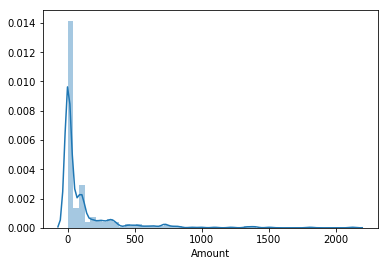

In [8]:
sns.distplot(Fraud.Amount)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


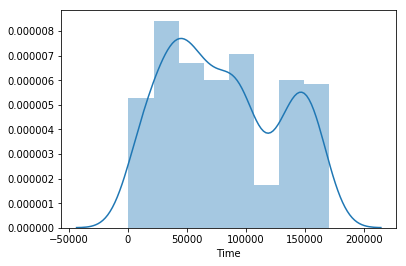

In [9]:
sns.distplot(Fraud.Time)

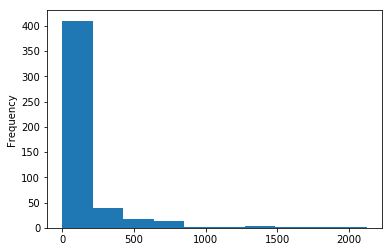

In [10]:
Fraud.Amount.plot.hist()

In [11]:
#Most of the fraud transaction amounts are < 2000. The frequenct amounts are in the range of 0-500

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


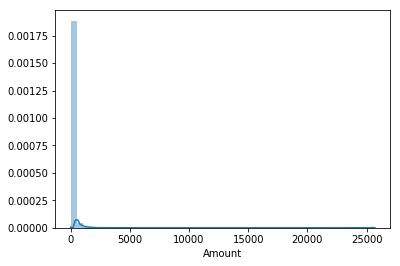

In [12]:
sns.distplot(NFraud.Amount)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


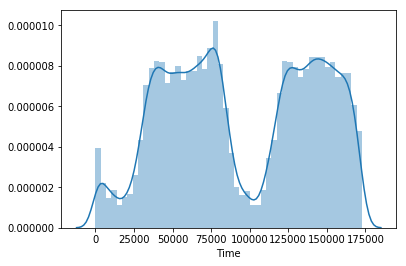

In [13]:
sns.distplot(NFraud.Time)

In [14]:
credit_corr = credit.corr()

In [15]:
credit_corr.Class[(abs(credit_corr.Class) >= 0.02) & (credit_corr.Class !=1)].sort_values()

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V18   -0.111485
V1    -0.101347
V9    -0.097733
V5    -0.094974
V6    -0.043643
V20    0.020090
V19    0.034783
V21    0.040413
V2     0.091289
V4     0.133447
V11    0.154876
Name: Class, dtype: float64

In [16]:
new_credit_corr = credit_corr[(abs(credit_corr.Class) >= 0.02) & (credit_corr.Class !=1)]

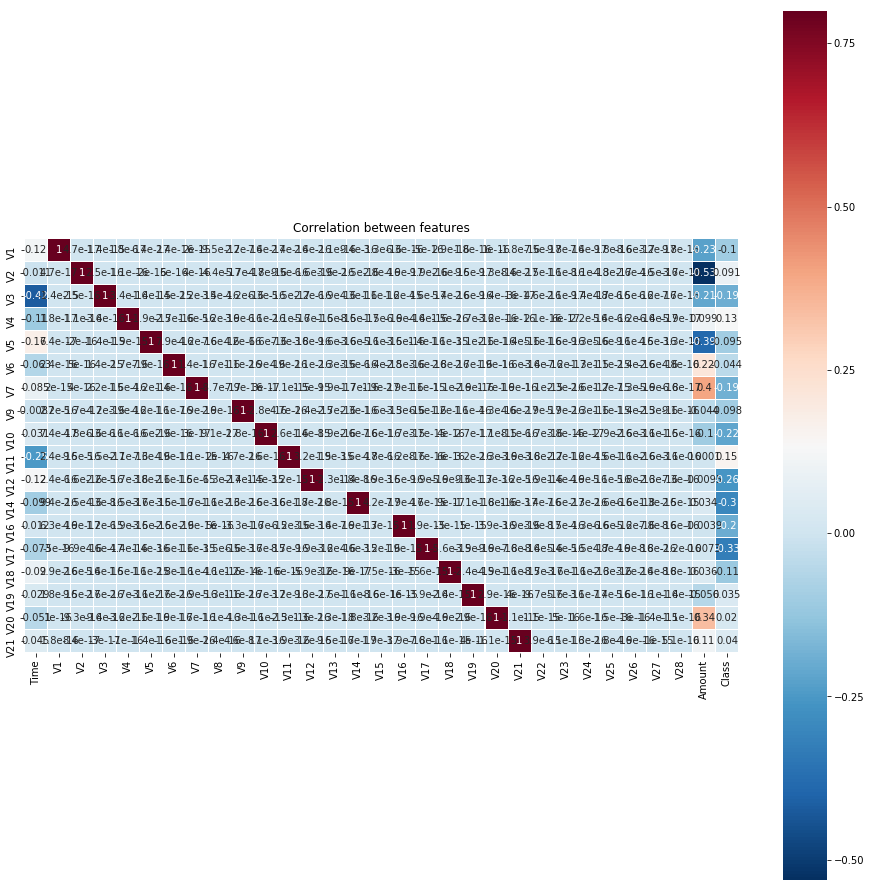

In [17]:
plt.figure(figsize=(16, 16))

sns.heatmap(new_credit_corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='RdBu_r',linecolor="white")
plt.title('Correlation between features');

# Group K Fold and LGBM Classifier

In [18]:
X = credit.drop(['Class'], axis=1)
y = credit['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(199364, 30) (199364,) (85443, 30) (85443,)


In [20]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(348, 199016, 0.0017455508517084327, 0.9982544491482915)

In [21]:
len(y_test[y_test == 1]), len(y_test[y_test == 0]), len(y_test[y_test == 1])/len(y_test), len(y_test[y_test == 0])/len(y_test)

(144, 85299, 0.0016853340823707033, 0.9983146659176293)

In [22]:
train_df = X_train.copy()
train_df['Class'] = y_train
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85606,60850.0,-2.181700,-1.081516,-0.455676,-0.469416,3.181412,2.792502,-0.969722,1.514169,-0.270947,...,-0.010621,-0.765830,-0.033177,1.036212,0.164195,0.237369,0.210396,-0.169310,55.83,0
88765,62281.0,0.966174,-0.436168,1.236803,0.735214,-0.525551,1.525499,-1.014347,0.704637,1.032686,...,0.040025,0.407304,0.208419,-0.613252,-0.136451,0.427657,0.082106,0.014315,11.50,0
278969,168560.0,-0.133786,0.980320,-0.256613,-0.764404,1.344491,-0.432592,1.034280,-0.067171,-0.197342,...,-0.306188,-0.898982,-0.068233,-0.083356,-0.549305,0.136005,0.107416,0.194498,0.89,0
165839,117700.0,1.097971,-0.974633,-0.599038,4.389753,-0.434954,0.319253,0.375607,-0.096094,-0.303140,...,0.332687,0.323639,-0.280183,0.076090,-0.045856,0.088169,-0.079773,0.024493,410.62,0
223172,143273.0,0.132701,0.632600,-0.047073,-0.618284,0.648191,-0.620230,1.104518,-0.239833,-0.237938,...,0.197347,0.534069,-0.143050,-0.681905,-0.150104,0.353270,-0.001355,0.030638,52.37,0


In [23]:
len(train_df[train_df.Class == 1]), len(train_df[train_df.Class == 0])

(348, 199016)

In [24]:
test_df = X_test.copy()
test_df['Class'] = y_test
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148943,90344.0,-0.163337,1.512098,1.217663,2.825107,1.241397,-0.139000,1.425058,-0.428575,-0.546872,...,0.062645,0.466575,-0.352740,-0.189612,0.372810,0.083304,-0.227115,-0.226318,29.63,0
110204,71722.0,-0.866219,0.804735,1.805019,-0.533586,0.619282,-0.735604,0.837338,-0.111872,-0.725186,...,-0.201301,-0.738694,-0.179406,-0.108885,0.326540,0.047763,-0.019130,0.063679,16.98,0
120616,75892.0,-2.155271,-0.175687,-0.364020,-1.743619,-2.893340,1.043236,1.817242,0.815885,0.832096,...,0.163686,0.481984,0.444372,-0.327187,0.078171,-0.780713,0.321325,-0.201845,556.59,0
5861,6382.0,-0.339932,1.380201,1.072837,1.332428,-0.419216,-1.053882,0.412905,0.080688,0.386621,...,0.081392,0.415919,0.054285,0.893219,-0.185338,-0.403577,-0.069670,-0.015613,28.50,0
201551,133934.0,-1.161314,-0.287604,1.415444,-0.396877,0.695260,5.645620,-1.924195,2.079636,-0.108793,...,-0.212369,0.130911,-0.211139,0.693450,0.549518,-0.129519,0.345588,0.076093,50.00,0


In [25]:
len(test_df[test_df.Class == 1]), len(test_df[test_df.Class == 0])

(144, 85299)

In [26]:
from sklearn import ensemble

# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GroupKFold
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as lgb

In [27]:
train_df.Time.unique()

array([ 60850.,  62281., 168560., ...,  77522.,  97947., 122992.])

In [28]:
unique_txn = np.array(sorted(train_df.Time))
len(unique_txn)
print(unique_txn)

[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72784e+05 1.72787e+05
 1.72788e+05]


In [29]:
group_kfold = GroupKFold(n_splits=100)
fold_ids = []
ids = np.arange(train_df.shape[0])
for trn, val in group_kfold.split(X=unique_txn, y=unique_txn, groups=unique_txn):
    fold_ids.append(
        [
            ids[train_df['Time'].isin(unique_txn[trn])],
            ids[train_df['Time'].isin(unique_txn[val])]
        ]
    )

In [30]:
train_feats = [feat for feat in train_df.columns if feat != 'Class']
print(train_feats)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [31]:
impt = pd.DataFrame()
val_pred = np.zeros(train_df.shape[0])
final_test_pred = np.zeros(test_df.shape[0])
for fold, (trn, val) in enumerate(fold_ids):
    X_train, y_train = train_df[train_feats].iloc[trn], y.iloc[trn]
    X_val, y_val = train_df[train_feats].iloc[val], y.iloc[val]
    
    lgbmodel = lgb.LGBMClassifier(
        num_leaves=31,
        learning_rate=0.03,
        n_estimators=1000,
        subsample=.9,
        colsample_bytree=.9,
        random_state=1
    )
    lgbmodel.fit(
        X_train, y_train, 
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=50,
        verbose=100,
        eval_metric=['auc', 'binary_logloss'],
    )
    feat_impt = pd.DataFrame()
    feat_impt['features'] = train_feats
    feat_impt['gain'] = lgbmodel.booster_.feature_importance(importance_type='gain')
    feat_impt['fold'] = fold + 1
    impt = pd.concat([impt, feat_impt], axis=0, sort=False)
    print("Fold# ", fold)
    val_pred[val] = lgbmodel.predict(X_val, num_iteration=lgbmodel.best_iteration_)
        
    test_pred = lgbmodel.predict(test_df[train_feats], num_iteration=lgbmodel.best_iteration_)
    #print(test_pred)
    final_test_pred += (test_pred)/len(fold_ids)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.917294	valid_0's binary_logloss: 0.444732
Fold#  0


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.47991	valid_0's binary_logloss: 0.0322111
Early stopping, best iteration is:
[146]	valid_0's auc: 0.730454	valid_0's binary_logloss: 0.0153423
Fold#  1


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.61998	valid_0's binary_logloss: 0.128621
Fold#  2


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.82288	valid_0's binary_logloss: 0.0285931
Early stopping, best iteration is:
[130]	valid_0's auc: 0.843954	valid_0's binary_logloss: 0.0141279
Fold#  3


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.620664	valid_0's binary_logloss: 0.429322
Fold#  4


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.603392	valid_0's binary_logloss: 0.462482
Fold#  5


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.777728	valid_0's binary_logloss: 0.173006
Fold#  6


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.594939	valid_0's binary_logloss: 0.399584
Fold#  7


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.668298	valid_0's binary_logloss: 0.428359
Fold#  8


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.65478	valid_0's binary_logloss: 0.0322144
Early stopping, best iteration is:
[79]	valid_0's auc: 0.785953	valid_0's binary_logloss: 0.0536908
Fold#  9


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.728299	valid_0's binary_logloss: 0.397402
Fold#  10


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.53627	valid_0's binary_logloss: 0.444733
Fold#  11


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.797314	valid_0's binary_logloss: 0.397785
Fold#  12


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.44482	valid_0's binary_logloss: 0.0394116
Early stopping, best iteration is:
[53]	valid_0's auc: 0.460349	valid_0's binary_logloss: 0.11579
Fold#  13


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[27]	valid_0's auc: 0.758915	valid_0's binary_logloss: 0.252979
Fold#  14


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.811683	valid_0's binary_logloss: 0.585552
Fold#  15


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.615485	valid_0's binary_logloss: 0.178409
Fold#  16


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[13]	valid_0's auc: 0.719518	valid_0's binary_logloss: 0.4124
Fold#  17


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[3]	valid_0's auc: 0.613811	valid_0's binary_logloss: 0.610418
Fold#  18


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.701909	valid_0's binary_logloss: 0.0322327
Early stopping, best iteration is:
[81]	valid_0's auc: 0.738406	valid_0's binary_logloss: 0.0509738
Fold#  19


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.535015	valid_0's binary_logloss: 0.128569
Fold#  20


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.416943	valid_0's binary_logloss: 0.585685
Fold#  21


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.473869	valid_0's binary_logloss: 0.663823
Fold#  22


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[20]	valid_0's auc: 0.757726	valid_0's binary_logloss: 0.321757
Fold#  23


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.559548	valid_0's binary_logloss: 0.663827
Fold#  24


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[8]	valid_0's auc: 0.349657	valid_0's binary_logloss: 0.499159
Fold#  25


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.693399	valid_0's binary_logloss: 0.0304469
Early stopping, best iteration is:
[57]	valid_0's auc: 0.756526	valid_0's binary_logloss: 0.0979737
Fold#  26


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.44721	valid_0's binary_logloss: 0.663859
Fold#  27


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.554217	valid_0's binary_logloss: 0.663767
Fold#  28


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[17]	valid_0's auc: 0.691018	valid_0's binary_logloss: 0.357652
Fold#  29


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[13]	valid_0's auc: 0.739573	valid_0's binary_logloss: 0.413381
Fold#  30


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.6444	valid_0's binary_logloss: 0.0322484
Early stopping, best iteration is:
[93]	valid_0's auc: 0.693621	valid_0's binary_logloss: 0.0378453
Fold#  31


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.509915	valid_0's binary_logloss: 0.0304283
Early stopping, best iteration is:
[64]	valid_0's auc: 0.739081	valid_0's binary_logloss: 0.0796899
Fold#  32


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.486571	valid_0's binary_logloss: 0.444768
Fold#  33


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.490548	valid_0's binary_logloss: 0.636266
Fold#  34


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.555946	valid_0's binary_logloss: 0.663733
Fold#  35


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.63997	valid_0's binary_logloss: 0.0358031
Early stopping, best iteration is:
[101]	valid_0's auc: 0.642785	valid_0's binary_logloss: 0.0351291
Fold#  36


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.554244	valid_0's binary_logloss: 0.663801
Fold#  37


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[43]	valid_0's auc: 0.598143	valid_0's binary_logloss: 0.150227
Fold#  38


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.547063	valid_0's binary_logloss: 0.0305015
Early stopping, best iteration is:
[98]	valid_0's auc: 0.573419	valid_0's binary_logloss: 0.0320067
Fold#  39


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.570063	valid_0's binary_logloss: 0.0395587
Early stopping, best iteration is:
[86]	valid_0's auc: 0.623769	valid_0's binary_logloss: 0.0513414
Fold#  40


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.531391	valid_0's binary_logloss: 0.540039
Fold#  41


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.683392	valid_0's binary_logloss: 0.445898
Fold#  42


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.547613	valid_0's binary_logloss: 0.0340828
Early stopping, best iteration is:
[132]	valid_0's auc: 0.721231	valid_0's binary_logloss: 0.0203683
Fold#  43


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[19]	valid_0's auc: 0.78552	valid_0's binary_logloss: 0.333696
Fold#  44


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.762142	valid_0's binary_logloss: 0.462749
Fold#  45


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.467839	valid_0's binary_logloss: 0.663824
Fold#  46


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.763399	valid_0's binary_logloss: 0.445647
Fold#  47


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.611463	valid_0's binary_logloss: 0.585665
Fold#  48


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 0.706573	valid_0's binary_logloss: 0.281592
Fold#  49


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.68008	valid_0's binary_logloss: 0.429641
Fold#  50


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.712441	valid_0's binary_logloss: 0.39921
Fold#  51


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[19]	valid_0's auc: 0.70548	valid_0's binary_logloss: 0.333692
Fold#  52


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.975916	valid_0's binary_logloss: 0.461705
Fold#  53


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.494048	valid_0's binary_logloss: 0.0376209
Early stopping, best iteration is:
[77]	valid_0's auc: 0.521797	valid_0's binary_logloss: 0.0609727
Fold#  54


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.488783	valid_0's binary_logloss: 0.636159
Fold#  55


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.47338	valid_0's binary_logloss: 0.663797
Fold#  56


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[8]	valid_0's auc: 0.38222	valid_0's binary_logloss: 0.499141
Fold#  57


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.635616	valid_0's binary_logloss: 0.215206
Fold#  58


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[3]	valid_0's auc: 0.956554	valid_0's binary_logloss: 0.610078
Fold#  59


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.695714	valid_0's binary_logloss: 0.398125
Fold#  60


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.768941	valid_0's binary_logloss: 0.428028
Fold#  61


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 0.700234	valid_0's binary_logloss: 0.279887
Fold#  62


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[3]	valid_0's auc: 0.533367	valid_0's binary_logloss: 0.609911
Fold#  63


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[7]	valid_0's auc: 0.394294	valid_0's binary_logloss: 0.51926
Fold#  64


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[19]	valid_0's auc: 0.501174	valid_0's binary_logloss: 0.33417
Fold#  65


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[8]	valid_0's auc: 0.972641	valid_0's binary_logloss: 0.498752
Fold#  66


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.63124	valid_0's binary_logloss: 0.636152
Fold#  67


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.534314	valid_0's binary_logloss: 0.585566
Fold#  68


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[3]	valid_0's auc: 0.465058	valid_0's binary_logloss: 0.610179
Fold#  69


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[7]	valid_0's auc: 0.634427	valid_0's binary_logloss: 0.519291
Fold#  70


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.644869	valid_0's binary_logloss: 0.445656
Fold#  71


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.42832	valid_0's binary_logloss: 0.0394982
Early stopping, best iteration is:
[50]	valid_0's auc: 0.498453	valid_0's binary_logloss: 0.126148
Fold#  72


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.792379	valid_0's binary_logloss: 0.636159
Fold#  73


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.303365	valid_0's binary_logloss: 0.585342
Fold#  74


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.497834	valid_0's binary_logloss: 0.0483538
Early stopping, best iteration is:
[84]	valid_0's auc: 0.535209	valid_0's binary_logloss: 0.0612937
Fold#  75


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.566114	valid_0's binary_logloss: 0.462485
Fold#  76


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.933702	valid_0's binary_logloss: 0.561988
Fold#  77


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.526296	valid_0's binary_logloss: 0.663888
Fold#  78


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.309829	valid_0's binary_logloss: 0.0340634
Early stopping, best iteration is:
[52]	valid_0's auc: 0.509427	valid_0's binary_logloss: 0.11596
Fold#  79


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.566265	valid_0's binary_logloss: 0.63604
Fold#  80


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[30]	valid_0's auc: 0.580986	valid_0's binary_logloss: 0.23033
Fold#  81


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.578643	valid_0's binary_logloss: 0.663797
Fold#  82


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[31]	valid_0's auc: 0.68459	valid_0's binary_logloss: 0.221518
Fold#  83


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.659689	valid_0's binary_logloss: 0.42995
Fold#  84


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.649145	valid_0's binary_logloss: 0.636274
Fold#  85


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.439524	valid_0's binary_logloss: 0.190814
Fold#  86


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.619658	valid_0's binary_logloss: 0.663834
Fold#  87


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[20]	valid_0's auc: 0.540055	valid_0's binary_logloss: 0.32082
Fold#  88


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.479565	valid_0's binary_logloss: 0.663966
Fold#  89


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.530951	valid_0's binary_logloss: 0.462983
Fold#  90


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.982932	valid_0's binary_logloss: 0.636036
Fold#  91


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.544467	valid_0's binary_logloss: 0.663861
Fold#  92


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.953062	valid_0's binary_logloss: 0.539667
Fold#  93


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.546192	valid_0's binary_logloss: 0.428969
Fold#  94


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.730653	valid_0's binary_logloss: 0.0321324
Early stopping, best iteration is:
[119]	valid_0's auc: 0.793132	valid_0's binary_logloss: 0.0220266
Fold#  95


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 0.762431	valid_0's binary_logloss: 0.539869
Fold#  96


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[20]	valid_0's auc: 0.534708	valid_0's binary_logloss: 0.322297
Fold#  97


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[49]	valid_0's auc: 0.665392	valid_0's binary_logloss: 0.127778
Fold#  98


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[13]	valid_0's auc: 0.571087	valid_0's binary_logloss: 0.414069
Fold#  99


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
print('Accuracy: \n', accuracy_score(test_df.Class,final_test_pred))
print('Confusion Matrix: \n', confusion_matrix(test_df.Class,final_test_pred))
print('Classification Report: \n', classification_report(test_df.Class,final_test_pred))

Accuracy: 
 0.9983146659176293
Confusion Matrix: 
 [[85299     0]
 [  144     0]]
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.00      0.00      0.00       144

avg / total       1.00      1.00      1.00     85443



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
len(final_test_pred), len(test_df)

(85443, 85443)

In [35]:
test_pred[test_pred==1]

array([], dtype=int64)

In [36]:
pd.crosstab(test_df.Class, final_test_pred, colnames=['Predicted'], margins=True)

Predicted,0.0,All
Class,,
0,85299,85299
1,144,144
All,85443,85443


# LightGBM classifier hyperparameter optimization via scikit-learn's GridSearchCV</h2>

In [50]:
X = credit.drop(['Class'], axis=1)
y = credit['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(199364, 30) (199364,) (85443, 30) (85443,)


In [51]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.59831
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.913603	valid_0's binary_logloss: 0.520642
[3]	valid_0's auc: 0.91873	valid_0's binary_logloss: 0.455881
[4]	valid_0's auc: 0.937377	valid_0's binary_logloss: 0.401135
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394
[6]	valid_0's auc: 0.941829	valid_0's binary_logloss: 0.314116
[7]	valid_0's auc: 0.926853	valid_0's binary_logloss: 0.27919
[8]	valid_0's auc: 0.926595	valid_0's binary_logloss: 0.248726
[9]	valid_0's auc: 0.92679	valid_0's binary_logloss: 0.222042
[10]	valid_0's auc: 0.926772	valid_0's binary_logloss: 0.198553
Early stopping, best iteration is:
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.598321
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891647	valid_0's binary_logloss: 0.520658
[3]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.455898
[4]	valid_0's auc: 0.919089	valid_0's binary_logloss: 0.401162
[5]	valid_0's auc: 0.918984	valid_0's binary_logloss: 0.354412
[6]	valid_0's auc: 0.932673	valid_0's binary_logloss: 0.314138
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214
[8]	valid_0's auc: 0.93252	valid_0's binary_logloss: 0.248749
[9]	valid_0's auc: 0.932457	valid_0's binary_logloss: 0.222062
[10]	valid_0's auc: 0.932501	valid_0's binary_logloss: 0.198577
[11]	valid_0's auc: 0.932453	valid_0's binary_logloss: 0.177861
[12]	valid_0's auc: 0.932478	valid_0's binary_logloss: 0.159514
Early stopping, best iteration is:
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908279	valid_0's binary_logloss: 0.520702
[3]	valid_0's auc: 0.908304	valid_0's binary_logloss: 0.455951
[4]	valid_0's auc: 0.924028	valid_0's binary_logloss: 0.401225
[5]	valid_0's auc: 0.930878	valid_0's binary_logloss: 0.354467
[6]	valid_0's auc: 0.935085	valid_0's binary_logloss: 0.314196
[7]	valid_0's auc: 0.934254	valid_0's binary_logloss: 0.279267
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801
[9]	valid_0's auc: 0.938276	valid_0's binary_logloss: 0.222117
[10]	valid_0's auc: 0.938278	valid_0's binary_logloss: 0.198629
[11]	valid_0's auc: 0.938264	valid_0's binary_logloss: 0.177896
[12]	valid_0's auc: 0.938258	valid_0's binary_logloss: 0.159542
[13]	valid_0's auc: 0.938076	valid_0's binary_logloss: 0.143258
Early stopping, best iteration is:
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.59831
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.913603	valid_0's binary_logloss: 0.520642
[3]	valid_0's auc: 0.91873	valid_0's binary_logloss: 0.455881
[4]	valid_0's auc: 0.937377	valid_0's binary_logloss: 0.401135
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394
[6]	valid_0's auc: 0.941829	valid_0's binary_logloss: 0.314116
[7]	valid_0's auc: 0.926853	valid_0's binary_logloss: 0.27919
[8]	valid_0's auc: 0.926595	valid_0's binary_logloss: 0.248726
[9]	valid_0's auc: 0.92679	valid_0's binary_logloss: 0.222042
[10]	valid_0's auc: 0.926772	valid_0's binary_logloss: 0.198553
Early stopping, best iteration is:
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.598321
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891647	valid_0's binary_logloss: 0.520658
[3]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.455898
[4]	valid_0's auc: 0.919089	valid_0's binary_logloss: 0.401162
[5]	valid_0's auc: 0.918984	valid_0's binary_logloss: 0.354412
[6]	valid_0's auc: 0.932673	valid_0's binary_logloss: 0.314138
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214
[8]	valid_0's auc: 0.93252	valid_0's binary_logloss: 0.248749
[9]	valid_0's auc: 0.932457	valid_0's binary_logloss: 0.222062
[10]	valid_0's auc: 0.932501	valid_0's binary_logloss: 0.198577
[11]	valid_0's auc: 0.932453	valid_0's binary_logloss: 0.177861
[12]	valid_0's auc: 0.932478	valid_0's binary_logloss: 0.159514
Early stopping, best iteration is:
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908279	valid_0's binary_logloss: 0.520702
[3]	valid_0's auc: 0.908304	valid_0's binary_logloss: 0.455951
[4]	valid_0's auc: 0.924028	valid_0's binary_logloss: 0.401225
[5]	valid_0's auc: 0.930878	valid_0's binary_logloss: 0.354467
[6]	valid_0's auc: 0.935085	valid_0's binary_logloss: 0.314196
[7]	valid_0's auc: 0.934254	valid_0's binary_logloss: 0.279267
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801
[9]	valid_0's auc: 0.938276	valid_0's binary_logloss: 0.222117
[10]	valid_0's auc: 0.938278	valid_0's binary_logloss: 0.198629
[11]	valid_0's auc: 0.938264	valid_0's binary_logloss: 0.177896
[12]	valid_0's auc: 0.938258	valid_0's binary_logloss: 0.159542
[13]	valid_0's auc: 0.938076	valid_0's binary_logloss: 0.143258
Early stopping, best iteration is:
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.59831
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.913603	valid_0's binary_logloss: 0.520642
[3]	valid_0's auc: 0.91873	valid_0's binary_logloss: 0.455881
[4]	valid_0's auc: 0.937377	valid_0's binary_logloss: 0.401135
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394
[6]	valid_0's auc: 0.941829	valid_0's binary_logloss: 0.314116
[7]	valid_0's auc: 0.926853	valid_0's binary_logloss: 0.27919
[8]	valid_0's auc: 0.926595	valid_0's binary_logloss: 0.248726
[9]	valid_0's auc: 0.92679	valid_0's binary_logloss: 0.222042
[10]	valid_0's auc: 0.926772	valid_0's binary_logloss: 0.198553
Early stopping, best iteration is:
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.598321
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891647	valid_0's binary_logloss: 0.520658
[3]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.455898
[4]	valid_0's auc: 0.919089	valid_0's binary_logloss: 0.401162
[5]	valid_0's auc: 0.918984	valid_0's binary_logloss: 0.354412
[6]	valid_0's auc: 0.932673	valid_0's binary_logloss: 0.314138
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214
[8]	valid_0's auc: 0.93252	valid_0's binary_logloss: 0.248749
[9]	valid_0's auc: 0.932457	valid_0's binary_logloss: 0.222062
[10]	valid_0's auc: 0.932501	valid_0's binary_logloss: 0.198577
[11]	valid_0's auc: 0.932453	valid_0's binary_logloss: 0.177861
[12]	valid_0's auc: 0.932478	valid_0's binary_logloss: 0.159514
Early stopping, best iteration is:
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908279	valid_0's binary_logloss: 0.520702
[3]	valid_0's auc: 0.908304	valid_0's binary_logloss: 0.455951
[4]	valid_0's auc: 0.924028	valid_0's binary_logloss: 0.401225
[5]	valid_0's auc: 0.930878	valid_0's binary_logloss: 0.354467
[6]	valid_0's auc: 0.935085	valid_0's binary_logloss: 0.314196
[7]	valid_0's auc: 0.934254	valid_0's binary_logloss: 0.279267
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801
[9]	valid_0's auc: 0.938276	valid_0's binary_logloss: 0.222117
[10]	valid_0's auc: 0.938278	valid_0's binary_logloss: 0.198629
[11]	valid_0's auc: 0.938264	valid_0's binary_logloss: 0.177896
[12]	valid_0's auc: 0.938258	valid_0's binary_logloss: 0.159542
[13]	valid_0's auc: 0.938076	valid_0's binary_logloss: 0.143258
Early stopping, best iteration is:
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.59831
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.913603	valid_0's binary_logloss: 0.520642
[3]	valid_0's auc: 0.91873	valid_0's binary_logloss: 0.455881
[4]	valid_0's auc: 0.937377	valid_0's binary_logloss: 0.401135
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394
[6]	valid_0's auc: 0.941829	valid_0's binary_logloss: 0.314116
[7]	valid_0's auc: 0.926853	valid_0's binary_logloss: 0.27919
[8]	valid_0's auc: 0.926595	valid_0's binary_logloss: 0.248726
[9]	valid_0's auc: 0.92679	valid_0's binary_logloss: 0.222042
[10]	valid_0's auc: 0.926772	valid_0's binary_logloss: 0.198553
Early stopping, best iteration is:
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.598321
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891647	valid_0's binary_logloss: 0.520658
[3]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.455898
[4]	valid_0's auc: 0.919089	valid_0's binary_logloss: 0.401162
[5]	valid_0's auc: 0.918984	valid_0's binary_logloss: 0.354412
[6]	valid_0's auc: 0.932673	valid_0's binary_logloss: 0.314138
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214
[8]	valid_0's auc: 0.93252	valid_0's binary_logloss: 0.248749
[9]	valid_0's auc: 0.932457	valid_0's binary_logloss: 0.222062
[10]	valid_0's auc: 0.932501	valid_0's binary_logloss: 0.198577
[11]	valid_0's auc: 0.932453	valid_0's binary_logloss: 0.177861
[12]	valid_0's auc: 0.932478	valid_0's binary_logloss: 0.159514
Early stopping, best iteration is:
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908279	valid_0's binary_logloss: 0.520702
[3]	valid_0's auc: 0.908304	valid_0's binary_logloss: 0.455951
[4]	valid_0's auc: 0.924028	valid_0's binary_logloss: 0.401225
[5]	valid_0's auc: 0.930878	valid_0's binary_logloss: 0.354467
[6]	valid_0's auc: 0.935085	valid_0's binary_logloss: 0.314196
[7]	valid_0's auc: 0.934254	valid_0's binary_logloss: 0.279267
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801
[9]	valid_0's auc: 0.938276	valid_0's binary_logloss: 0.222117
[10]	valid_0's auc: 0.938278	valid_0's binary_logloss: 0.198629
[11]	valid_0's auc: 0.938264	valid_0's binary_logloss: 0.177896
[12]	valid_0's auc: 0.938258	valid_0's binary_logloss: 0.159542
[13]	valid_0's auc: 0.938076	valid_0's binary_logloss: 0.143258
Early stopping, best iteration is:
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.59831
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.913603	valid_0's binary_logloss: 0.520642
[3]	valid_0's auc: 0.91873	valid_0's binary_logloss: 0.455881
[4]	valid_0's auc: 0.937377	valid_0's binary_logloss: 0.401135
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394
[6]	valid_0's auc: 0.941829	valid_0's binary_logloss: 0.314116
[7]	valid_0's auc: 0.926853	valid_0's binary_logloss: 0.27919
[8]	valid_0's auc: 0.926595	valid_0's binary_logloss: 0.248726
[9]	valid_0's auc: 0.92679	valid_0's binary_logloss: 0.222042
[10]	valid_0's auc: 0.926772	valid_0's binary_logloss: 0.198553
Early stopping, best iteration is:
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.598321
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891647	valid_0's binary_logloss: 0.520658
[3]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.455898
[4]	valid_0's auc: 0.919089	valid_0's binary_logloss: 0.401162
[5]	valid_0's auc: 0.918984	valid_0's binary_logloss: 0.354412
[6]	valid_0's auc: 0.932673	valid_0's binary_logloss: 0.314138
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214
[8]	valid_0's auc: 0.93252	valid_0's binary_logloss: 0.248749
[9]	valid_0's auc: 0.932457	valid_0's binary_logloss: 0.222062
[10]	valid_0's auc: 0.932501	valid_0's binary_logloss: 0.198577
[11]	valid_0's auc: 0.932453	valid_0's binary_logloss: 0.177861
[12]	valid_0's auc: 0.932478	valid_0's binary_logloss: 0.159514
Early stopping, best iteration is:
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908279	valid_0's binary_logloss: 0.520702
[3]	valid_0's auc: 0.908304	valid_0's binary_logloss: 0.455951
[4]	valid_0's auc: 0.924028	valid_0's binary_logloss: 0.401225
[5]	valid_0's auc: 0.930878	valid_0's binary_logloss: 0.354467
[6]	valid_0's auc: 0.935085	valid_0's binary_logloss: 0.314196
[7]	valid_0's auc: 0.934254	valid_0's binary_logloss: 0.279267
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801
[9]	valid_0's auc: 0.938276	valid_0's binary_logloss: 0.222117
[10]	valid_0's auc: 0.938278	valid_0's binary_logloss: 0.198629
[11]	valid_0's auc: 0.938264	valid_0's binary_logloss: 0.177896
[12]	valid_0's auc: 0.938258	valid_0's binary_logloss: 0.159542
[13]	valid_0's auc: 0.938076	valid_0's binary_logloss: 0.143258
Early stopping, best iteration is:
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.59831
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.913603	valid_0's binary_logloss: 0.520642
[3]	valid_0's auc: 0.91873	valid_0's binary_logloss: 0.455881
[4]	valid_0's auc: 0.937377	valid_0's binary_logloss: 0.401135
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394
[6]	valid_0's auc: 0.941829	valid_0's binary_logloss: 0.314116
[7]	valid_0's auc: 0.926853	valid_0's binary_logloss: 0.27919
[8]	valid_0's auc: 0.926595	valid_0's binary_logloss: 0.248726
[9]	valid_0's auc: 0.92679	valid_0's binary_logloss: 0.222042
[10]	valid_0's auc: 0.926772	valid_0's binary_logloss: 0.198553
Early stopping, best iteration is:
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.598321
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891647	valid_0's binary_logloss: 0.520658
[3]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.455898
[4]	valid_0's auc: 0.919089	valid_0's binary_logloss: 0.401162
[5]	valid_0's auc: 0.918984	valid_0's binary_logloss: 0.354412
[6]	valid_0's auc: 0.932673	valid_0's binary_logloss: 0.314138
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214
[8]	valid_0's auc: 0.93252	valid_0's binary_logloss: 0.248749
[9]	valid_0's auc: 0.932457	valid_0's binary_logloss: 0.222062
[10]	valid_0's auc: 0.932501	valid_0's binary_logloss: 0.198577
[11]	valid_0's auc: 0.932453	valid_0's binary_logloss: 0.177861
[12]	valid_0's auc: 0.932478	valid_0's binary_logloss: 0.159514
Early stopping, best iteration is:
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908279	valid_0's binary_logloss: 0.520702
[3]	valid_0's auc: 0.908304	valid_0's binary_logloss: 0.455951
[4]	valid_0's auc: 0.924028	valid_0's binary_logloss: 0.401225
[5]	valid_0's auc: 0.930878	valid_0's binary_logloss: 0.354467
[6]	valid_0's auc: 0.935085	valid_0's binary_logloss: 0.314196
[7]	valid_0's auc: 0.934254	valid_0's binary_logloss: 0.279267
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801
[9]	valid_0's auc: 0.938276	valid_0's binary_logloss: 0.222117
[10]	valid_0's auc: 0.938278	valid_0's binary_logloss: 0.198629
[11]	valid_0's auc: 0.938264	valid_0's binary_logloss: 0.177896
[12]	valid_0's auc: 0.938258	valid_0's binary_logloss: 0.159542
[13]	valid_0's auc: 0.938076	valid_0's binary_logloss: 0.143258
Early stopping, best iteration is:
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.59831
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.913603	valid_0's binary_logloss: 0.520642
[3]	valid_0's auc: 0.91873	valid_0's binary_logloss: 0.455881
[4]	valid_0's auc: 0.937377	valid_0's binary_logloss: 0.401135
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394
[6]	valid_0's auc: 0.941829	valid_0's binary_logloss: 0.314116
[7]	valid_0's auc: 0.926853	valid_0's binary_logloss: 0.27919
[8]	valid_0's auc: 0.926595	valid_0's binary_logloss: 0.248726
[9]	valid_0's auc: 0.92679	valid_0's binary_logloss: 0.222042
[10]	valid_0's auc: 0.926772	valid_0's binary_logloss: 0.198553
Early stopping, best iteration is:
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.598321
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891647	valid_0's binary_logloss: 0.520658
[3]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.455898
[4]	valid_0's auc: 0.919089	valid_0's binary_logloss: 0.401162
[5]	valid_0's auc: 0.918984	valid_0's binary_logloss: 0.354412
[6]	valid_0's auc: 0.932673	valid_0's binary_logloss: 0.314138
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214
[8]	valid_0's auc: 0.93252	valid_0's binary_logloss: 0.248749
[9]	valid_0's auc: 0.932457	valid_0's binary_logloss: 0.222062
[10]	valid_0's auc: 0.932501	valid_0's binary_logloss: 0.198577
[11]	valid_0's auc: 0.932453	valid_0's binary_logloss: 0.177861
[12]	valid_0's auc: 0.932478	valid_0's binary_logloss: 0.159514
Early stopping, best iteration is:
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908279	valid_0's binary_logloss: 0.520702
[3]	valid_0's auc: 0.908304	valid_0's binary_logloss: 0.455951
[4]	valid_0's auc: 0.924028	valid_0's binary_logloss: 0.401225
[5]	valid_0's auc: 0.930878	valid_0's binary_logloss: 0.354467
[6]	valid_0's auc: 0.935085	valid_0's binary_logloss: 0.314196
[7]	valid_0's auc: 0.934254	valid_0's binary_logloss: 0.279267
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801
[9]	valid_0's auc: 0.938276	valid_0's binary_logloss: 0.222117
[10]	valid_0's auc: 0.938278	valid_0's binary_logloss: 0.198629
[11]	valid_0's auc: 0.938264	valid_0's binary_logloss: 0.177896
[12]	valid_0's auc: 0.938258	valid_0's binary_logloss: 0.159542
[13]	valid_0's auc: 0.938076	valid_0's binary_logloss: 0.143258
Early stopping, best iteration is:
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.59831
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.913603	valid_0's binary_logloss: 0.520642
[3]	valid_0's auc: 0.91873	valid_0's binary_logloss: 0.455881
[4]	valid_0's auc: 0.937377	valid_0's binary_logloss: 0.401135
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394
[6]	valid_0's auc: 0.941829	valid_0's binary_logloss: 0.314116
[7]	valid_0's auc: 0.926853	valid_0's binary_logloss: 0.27919
[8]	valid_0's auc: 0.926595	valid_0's binary_logloss: 0.248726
[9]	valid_0's auc: 0.92679	valid_0's binary_logloss: 0.222042
[10]	valid_0's auc: 0.926772	valid_0's binary_logloss: 0.198553
Early stopping, best iteration is:
[5]	valid_0's auc: 0.943447	valid_0's binary_logloss: 0.354394


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.598321
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891647	valid_0's binary_logloss: 0.520658
[3]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.455898
[4]	valid_0's auc: 0.919089	valid_0's binary_logloss: 0.401162
[5]	valid_0's auc: 0.918984	valid_0's binary_logloss: 0.354412
[6]	valid_0's auc: 0.932673	valid_0's binary_logloss: 0.314138
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214
[8]	valid_0's auc: 0.93252	valid_0's binary_logloss: 0.248749
[9]	valid_0's auc: 0.932457	valid_0's binary_logloss: 0.222062
[10]	valid_0's auc: 0.932501	valid_0's binary_logloss: 0.198577
[11]	valid_0's auc: 0.932453	valid_0's binary_logloss: 0.177861
[12]	valid_0's auc: 0.932478	valid_0's binary_logloss: 0.159514
Early stopping, best iteration is:
[7]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.279214


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908279	valid_0's binary_logloss: 0.520702
[3]	valid_0's auc: 0.908304	valid_0's binary_logloss: 0.455951
[4]	valid_0's auc: 0.924028	valid_0's binary_logloss: 0.401225
[5]	valid_0's auc: 0.930878	valid_0's binary_logloss: 0.354467
[6]	valid_0's auc: 0.935085	valid_0's binary_logloss: 0.314196
[7]	valid_0's auc: 0.934254	valid_0's binary_logloss: 0.279267
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801
[9]	valid_0's auc: 0.938276	valid_0's binary_logloss: 0.222117
[10]	valid_0's auc: 0.938278	valid_0's binary_logloss: 0.198629
[11]	valid_0's auc: 0.938264	valid_0's binary_logloss: 0.177896
[12]	valid_0's auc: 0.938258	valid_0's binary_logloss: 0.159542
[13]	valid_0's auc: 0.938076	valid_0's binary_logloss: 0.143258
Early stopping, best iteration is:
[8]	valid_0's auc: 0.940646	valid_0's binary_logloss: 0.248801


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.57615
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.48498
[3]	valid_0's auc: 0.943226	valid_0's binary_logloss: 0.411968
[4]	valid_0's auc: 0.954762	valid_0's binary_logloss: 0.352349
[5]	valid_0's auc: 0.961443	valid_0's binary_logloss: 0.302982
[6]	valid_0's auc: 0.961143	valid_0's binary_logloss: 0.26164
[7]	valid_0's auc: 0.960747	valid_0's binary_logloss: 0.22674
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058
[9]	valid_0's auc: 0.960827	valid_0's binary_logloss: 0.171683
[10]	valid_0's auc: 0.960804	valid_0's binary_logloss: 0.149901
[11]	valid_0's auc: 0.960867	valid_0's binary_logloss: 0.131108
[12]	valid_0's auc: 0.960759	valid_0's binary_logloss: 0.114859
[13]	valid_0's auc: 0.961171	valid_0's binary_logloss: 0.100772
Early stopping, best iteration is:
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.576164
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891654	valid_0's binary_logloss: 0.485002
[3]	valid_0's auc: 0.898527	valid_0's binary_logloss: 0.411991
[4]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.352389
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302
[6]	valid_0's auc: 0.932122	valid_0's binary_logloss: 0.261682
[7]	valid_0's auc: 0.932149	valid_0's binary_logloss: 0.226771
[8]	valid_0's auc: 0.931961	valid_0's binary_logloss: 0.197101
[9]	valid_0's auc: 0.932098	valid_0's binary_logloss: 0.171724
[10]	valid_0's auc: 0.932048	valid_0's binary_logloss: 0.149938
Early stopping, best iteration is:
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.909702	valid_0's binary_logloss: 0.485054
[3]	valid_0's auc: 0.909303	valid_0's binary_logloss: 0.412068
[4]	valid_0's auc: 0.929842	valid_0's binary_logloss: 0.352458
[5]	valid_0's auc: 0.927425	valid_0's binary_logloss: 0.303083
[6]	valid_0's auc: 0.934045	valid_0's binary_logloss: 0.261749
[7]	valid_0's auc: 0.934042	valid_0's binary_logloss: 0.226837
[8]	valid_0's auc: 0.933979	valid_0's binary_logloss: 0.19715
[9]	valid_0's auc: 0.938502	valid_0's binary_logloss: 0.171773
[10]	valid_0's auc: 0.9385	valid_0's binary_logloss: 0.149969
[11]	valid_0's auc: 0.938307	valid_0's binary_logloss: 0.131176
[12]	valid_0's auc: 0.944775	valid_0's binary_logloss: 0.114922
[13]	valid_0's auc: 0.944765	valid_0's binary_logloss: 0.100811
[14]	valid_0's auc: 0.944758	valid_0's binary_logloss: 0.0885609
[15]	valid_0's auc: 0.944739	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.57615
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.48498
[3]	valid_0's auc: 0.943226	valid_0's binary_logloss: 0.411968
[4]	valid_0's auc: 0.954762	valid_0's binary_logloss: 0.352349
[5]	valid_0's auc: 0.961443	valid_0's binary_logloss: 0.302982
[6]	valid_0's auc: 0.961143	valid_0's binary_logloss: 0.26164
[7]	valid_0's auc: 0.960747	valid_0's binary_logloss: 0.22674
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058
[9]	valid_0's auc: 0.960827	valid_0's binary_logloss: 0.171683
[10]	valid_0's auc: 0.960804	valid_0's binary_logloss: 0.149901
[11]	valid_0's auc: 0.960867	valid_0's binary_logloss: 0.131108
[12]	valid_0's auc: 0.960759	valid_0's binary_logloss: 0.114859
[13]	valid_0's auc: 0.961171	valid_0's binary_logloss: 0.100772
Early stopping, best iteration is:
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.576164
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891654	valid_0's binary_logloss: 0.485002
[3]	valid_0's auc: 0.898527	valid_0's binary_logloss: 0.411991
[4]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.352389
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302
[6]	valid_0's auc: 0.932122	valid_0's binary_logloss: 0.261682
[7]	valid_0's auc: 0.932149	valid_0's binary_logloss: 0.226771
[8]	valid_0's auc: 0.931961	valid_0's binary_logloss: 0.197101
[9]	valid_0's auc: 0.932098	valid_0's binary_logloss: 0.171724
[10]	valid_0's auc: 0.932048	valid_0's binary_logloss: 0.149938
Early stopping, best iteration is:
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.909702	valid_0's binary_logloss: 0.485054
[3]	valid_0's auc: 0.909303	valid_0's binary_logloss: 0.412068
[4]	valid_0's auc: 0.929842	valid_0's binary_logloss: 0.352458
[5]	valid_0's auc: 0.927425	valid_0's binary_logloss: 0.303083
[6]	valid_0's auc: 0.934045	valid_0's binary_logloss: 0.261749
[7]	valid_0's auc: 0.934042	valid_0's binary_logloss: 0.226837
[8]	valid_0's auc: 0.933979	valid_0's binary_logloss: 0.19715
[9]	valid_0's auc: 0.938502	valid_0's binary_logloss: 0.171773
[10]	valid_0's auc: 0.9385	valid_0's binary_logloss: 0.149969
[11]	valid_0's auc: 0.938307	valid_0's binary_logloss: 0.131176
[12]	valid_0's auc: 0.944775	valid_0's binary_logloss: 0.114922
[13]	valid_0's auc: 0.944765	valid_0's binary_logloss: 0.100811
[14]	valid_0's auc: 0.944758	valid_0's binary_logloss: 0.0885609
[15]	valid_0's auc: 0.944739	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.57615
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.48498
[3]	valid_0's auc: 0.943226	valid_0's binary_logloss: 0.411968
[4]	valid_0's auc: 0.954762	valid_0's binary_logloss: 0.352349
[5]	valid_0's auc: 0.961443	valid_0's binary_logloss: 0.302982
[6]	valid_0's auc: 0.961143	valid_0's binary_logloss: 0.26164
[7]	valid_0's auc: 0.960747	valid_0's binary_logloss: 0.22674
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058
[9]	valid_0's auc: 0.960827	valid_0's binary_logloss: 0.171683
[10]	valid_0's auc: 0.960804	valid_0's binary_logloss: 0.149901
[11]	valid_0's auc: 0.960867	valid_0's binary_logloss: 0.131108
[12]	valid_0's auc: 0.960759	valid_0's binary_logloss: 0.114859
[13]	valid_0's auc: 0.961171	valid_0's binary_logloss: 0.100772
Early stopping, best iteration is:
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.576164
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891654	valid_0's binary_logloss: 0.485002
[3]	valid_0's auc: 0.898527	valid_0's binary_logloss: 0.411991
[4]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.352389
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302
[6]	valid_0's auc: 0.932122	valid_0's binary_logloss: 0.261682
[7]	valid_0's auc: 0.932149	valid_0's binary_logloss: 0.226771
[8]	valid_0's auc: 0.931961	valid_0's binary_logloss: 0.197101
[9]	valid_0's auc: 0.932098	valid_0's binary_logloss: 0.171724
[10]	valid_0's auc: 0.932048	valid_0's binary_logloss: 0.149938
Early stopping, best iteration is:
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.909702	valid_0's binary_logloss: 0.485054
[3]	valid_0's auc: 0.909303	valid_0's binary_logloss: 0.412068
[4]	valid_0's auc: 0.929842	valid_0's binary_logloss: 0.352458
[5]	valid_0's auc: 0.927425	valid_0's binary_logloss: 0.303083
[6]	valid_0's auc: 0.934045	valid_0's binary_logloss: 0.261749
[7]	valid_0's auc: 0.934042	valid_0's binary_logloss: 0.226837
[8]	valid_0's auc: 0.933979	valid_0's binary_logloss: 0.19715
[9]	valid_0's auc: 0.938502	valid_0's binary_logloss: 0.171773
[10]	valid_0's auc: 0.9385	valid_0's binary_logloss: 0.149969
[11]	valid_0's auc: 0.938307	valid_0's binary_logloss: 0.131176
[12]	valid_0's auc: 0.944775	valid_0's binary_logloss: 0.114922
[13]	valid_0's auc: 0.944765	valid_0's binary_logloss: 0.100811
[14]	valid_0's auc: 0.944758	valid_0's binary_logloss: 0.0885609
[15]	valid_0's auc: 0.944739	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.57615
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.48498
[3]	valid_0's auc: 0.943226	valid_0's binary_logloss: 0.411968
[4]	valid_0's auc: 0.954762	valid_0's binary_logloss: 0.352349
[5]	valid_0's auc: 0.961443	valid_0's binary_logloss: 0.302982
[6]	valid_0's auc: 0.961143	valid_0's binary_logloss: 0.26164
[7]	valid_0's auc: 0.960747	valid_0's binary_logloss: 0.22674
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058
[9]	valid_0's auc: 0.960827	valid_0's binary_logloss: 0.171683
[10]	valid_0's auc: 0.960804	valid_0's binary_logloss: 0.149901
[11]	valid_0's auc: 0.960867	valid_0's binary_logloss: 0.131108
[12]	valid_0's auc: 0.960759	valid_0's binary_logloss: 0.114859
[13]	valid_0's auc: 0.961171	valid_0's binary_logloss: 0.100772
Early stopping, best iteration is:
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.576164
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891654	valid_0's binary_logloss: 0.485002
[3]	valid_0's auc: 0.898527	valid_0's binary_logloss: 0.411991
[4]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.352389
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302
[6]	valid_0's auc: 0.932122	valid_0's binary_logloss: 0.261682
[7]	valid_0's auc: 0.932149	valid_0's binary_logloss: 0.226771
[8]	valid_0's auc: 0.931961	valid_0's binary_logloss: 0.197101
[9]	valid_0's auc: 0.932098	valid_0's binary_logloss: 0.171724
[10]	valid_0's auc: 0.932048	valid_0's binary_logloss: 0.149938
Early stopping, best iteration is:
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.909702	valid_0's binary_logloss: 0.485054
[3]	valid_0's auc: 0.909303	valid_0's binary_logloss: 0.412068
[4]	valid_0's auc: 0.929842	valid_0's binary_logloss: 0.352458
[5]	valid_0's auc: 0.927425	valid_0's binary_logloss: 0.303083
[6]	valid_0's auc: 0.934045	valid_0's binary_logloss: 0.261749
[7]	valid_0's auc: 0.934042	valid_0's binary_logloss: 0.226837
[8]	valid_0's auc: 0.933979	valid_0's binary_logloss: 0.19715
[9]	valid_0's auc: 0.938502	valid_0's binary_logloss: 0.171773
[10]	valid_0's auc: 0.9385	valid_0's binary_logloss: 0.149969
[11]	valid_0's auc: 0.938307	valid_0's binary_logloss: 0.131176
[12]	valid_0's auc: 0.944775	valid_0's binary_logloss: 0.114922
[13]	valid_0's auc: 0.944765	valid_0's binary_logloss: 0.100811
[14]	valid_0's auc: 0.944758	valid_0's binary_logloss: 0.0885609
[15]	valid_0's auc: 0.944739	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.57615
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.48498
[3]	valid_0's auc: 0.943226	valid_0's binary_logloss: 0.411968
[4]	valid_0's auc: 0.954762	valid_0's binary_logloss: 0.352349
[5]	valid_0's auc: 0.961443	valid_0's binary_logloss: 0.302982
[6]	valid_0's auc: 0.961143	valid_0's binary_logloss: 0.26164
[7]	valid_0's auc: 0.960747	valid_0's binary_logloss: 0.22674
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058
[9]	valid_0's auc: 0.960827	valid_0's binary_logloss: 0.171683
[10]	valid_0's auc: 0.960804	valid_0's binary_logloss: 0.149901
[11]	valid_0's auc: 0.960867	valid_0's binary_logloss: 0.131108
[12]	valid_0's auc: 0.960759	valid_0's binary_logloss: 0.114859
[13]	valid_0's auc: 0.961171	valid_0's binary_logloss: 0.100772
Early stopping, best iteration is:
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.576164
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891654	valid_0's binary_logloss: 0.485002
[3]	valid_0's auc: 0.898527	valid_0's binary_logloss: 0.411991
[4]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.352389
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302
[6]	valid_0's auc: 0.932122	valid_0's binary_logloss: 0.261682
[7]	valid_0's auc: 0.932149	valid_0's binary_logloss: 0.226771
[8]	valid_0's auc: 0.931961	valid_0's binary_logloss: 0.197101
[9]	valid_0's auc: 0.932098	valid_0's binary_logloss: 0.171724
[10]	valid_0's auc: 0.932048	valid_0's binary_logloss: 0.149938
Early stopping, best iteration is:
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.909702	valid_0's binary_logloss: 0.485054
[3]	valid_0's auc: 0.909303	valid_0's binary_logloss: 0.412068
[4]	valid_0's auc: 0.929842	valid_0's binary_logloss: 0.352458
[5]	valid_0's auc: 0.927425	valid_0's binary_logloss: 0.303083
[6]	valid_0's auc: 0.934045	valid_0's binary_logloss: 0.261749
[7]	valid_0's auc: 0.934042	valid_0's binary_logloss: 0.226837
[8]	valid_0's auc: 0.933979	valid_0's binary_logloss: 0.19715
[9]	valid_0's auc: 0.938502	valid_0's binary_logloss: 0.171773
[10]	valid_0's auc: 0.9385	valid_0's binary_logloss: 0.149969
[11]	valid_0's auc: 0.938307	valid_0's binary_logloss: 0.131176
[12]	valid_0's auc: 0.944775	valid_0's binary_logloss: 0.114922
[13]	valid_0's auc: 0.944765	valid_0's binary_logloss: 0.100811
[14]	valid_0's auc: 0.944758	valid_0's binary_logloss: 0.0885609
[15]	valid_0's auc: 0.944739	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.57615
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.48498
[3]	valid_0's auc: 0.943226	valid_0's binary_logloss: 0.411968
[4]	valid_0's auc: 0.954762	valid_0's binary_logloss: 0.352349
[5]	valid_0's auc: 0.961443	valid_0's binary_logloss: 0.302982
[6]	valid_0's auc: 0.961143	valid_0's binary_logloss: 0.26164
[7]	valid_0's auc: 0.960747	valid_0's binary_logloss: 0.22674
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058
[9]	valid_0's auc: 0.960827	valid_0's binary_logloss: 0.171683
[10]	valid_0's auc: 0.960804	valid_0's binary_logloss: 0.149901
[11]	valid_0's auc: 0.960867	valid_0's binary_logloss: 0.131108
[12]	valid_0's auc: 0.960759	valid_0's binary_logloss: 0.114859
[13]	valid_0's auc: 0.961171	valid_0's binary_logloss: 0.100772
Early stopping, best iteration is:
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.576164
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891654	valid_0's binary_logloss: 0.485002
[3]	valid_0's auc: 0.898527	valid_0's binary_logloss: 0.411991
[4]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.352389
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302
[6]	valid_0's auc: 0.932122	valid_0's binary_logloss: 0.261682
[7]	valid_0's auc: 0.932149	valid_0's binary_logloss: 0.226771
[8]	valid_0's auc: 0.931961	valid_0's binary_logloss: 0.197101
[9]	valid_0's auc: 0.932098	valid_0's binary_logloss: 0.171724
[10]	valid_0's auc: 0.932048	valid_0's binary_logloss: 0.149938
Early stopping, best iteration is:
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.909702	valid_0's binary_logloss: 0.485054
[3]	valid_0's auc: 0.909303	valid_0's binary_logloss: 0.412068
[4]	valid_0's auc: 0.929842	valid_0's binary_logloss: 0.352458
[5]	valid_0's auc: 0.927425	valid_0's binary_logloss: 0.303083
[6]	valid_0's auc: 0.934045	valid_0's binary_logloss: 0.261749
[7]	valid_0's auc: 0.934042	valid_0's binary_logloss: 0.226837
[8]	valid_0's auc: 0.933979	valid_0's binary_logloss: 0.19715
[9]	valid_0's auc: 0.938502	valid_0's binary_logloss: 0.171773
[10]	valid_0's auc: 0.9385	valid_0's binary_logloss: 0.149969
[11]	valid_0's auc: 0.938307	valid_0's binary_logloss: 0.131176
[12]	valid_0's auc: 0.944775	valid_0's binary_logloss: 0.114922
[13]	valid_0's auc: 0.944765	valid_0's binary_logloss: 0.100811
[14]	valid_0's auc: 0.944758	valid_0's binary_logloss: 0.0885609
[15]	valid_0's auc: 0.944739	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.57615
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.48498
[3]	valid_0's auc: 0.943226	valid_0's binary_logloss: 0.411968
[4]	valid_0's auc: 0.954762	valid_0's binary_logloss: 0.352349
[5]	valid_0's auc: 0.961443	valid_0's binary_logloss: 0.302982
[6]	valid_0's auc: 0.961143	valid_0's binary_logloss: 0.26164
[7]	valid_0's auc: 0.960747	valid_0's binary_logloss: 0.22674
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058
[9]	valid_0's auc: 0.960827	valid_0's binary_logloss: 0.171683
[10]	valid_0's auc: 0.960804	valid_0's binary_logloss: 0.149901
[11]	valid_0's auc: 0.960867	valid_0's binary_logloss: 0.131108
[12]	valid_0's auc: 0.960759	valid_0's binary_logloss: 0.114859
[13]	valid_0's auc: 0.961171	valid_0's binary_logloss: 0.100772
Early stopping, best iteration is:
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.576164
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891654	valid_0's binary_logloss: 0.485002
[3]	valid_0's auc: 0.898527	valid_0's binary_logloss: 0.411991
[4]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.352389
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302
[6]	valid_0's auc: 0.932122	valid_0's binary_logloss: 0.261682
[7]	valid_0's auc: 0.932149	valid_0's binary_logloss: 0.226771
[8]	valid_0's auc: 0.931961	valid_0's binary_logloss: 0.197101
[9]	valid_0's auc: 0.932098	valid_0's binary_logloss: 0.171724
[10]	valid_0's auc: 0.932048	valid_0's binary_logloss: 0.149938
Early stopping, best iteration is:
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.909702	valid_0's binary_logloss: 0.485054
[3]	valid_0's auc: 0.909303	valid_0's binary_logloss: 0.412068
[4]	valid_0's auc: 0.929842	valid_0's binary_logloss: 0.352458
[5]	valid_0's auc: 0.927425	valid_0's binary_logloss: 0.303083
[6]	valid_0's auc: 0.934045	valid_0's binary_logloss: 0.261749
[7]	valid_0's auc: 0.934042	valid_0's binary_logloss: 0.226837
[8]	valid_0's auc: 0.933979	valid_0's binary_logloss: 0.19715
[9]	valid_0's auc: 0.938502	valid_0's binary_logloss: 0.171773
[10]	valid_0's auc: 0.9385	valid_0's binary_logloss: 0.149969
[11]	valid_0's auc: 0.938307	valid_0's binary_logloss: 0.131176
[12]	valid_0's auc: 0.944775	valid_0's binary_logloss: 0.114922
[13]	valid_0's auc: 0.944765	valid_0's binary_logloss: 0.100811
[14]	valid_0's auc: 0.944758	valid_0's binary_logloss: 0.0885609
[15]	valid_0's auc: 0.944739	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.57615
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.48498
[3]	valid_0's auc: 0.943226	valid_0's binary_logloss: 0.411968
[4]	valid_0's auc: 0.954762	valid_0's binary_logloss: 0.352349
[5]	valid_0's auc: 0.961443	valid_0's binary_logloss: 0.302982
[6]	valid_0's auc: 0.961143	valid_0's binary_logloss: 0.26164
[7]	valid_0's auc: 0.960747	valid_0's binary_logloss: 0.22674
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058
[9]	valid_0's auc: 0.960827	valid_0's binary_logloss: 0.171683
[10]	valid_0's auc: 0.960804	valid_0's binary_logloss: 0.149901
[11]	valid_0's auc: 0.960867	valid_0's binary_logloss: 0.131108
[12]	valid_0's auc: 0.960759	valid_0's binary_logloss: 0.114859
[13]	valid_0's auc: 0.961171	valid_0's binary_logloss: 0.100772
Early stopping, best iteration is:
[8]	valid_0's auc: 0.961704	valid_0's binary_logloss: 0.197058


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.576164
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891654	valid_0's binary_logloss: 0.485002
[3]	valid_0's auc: 0.898527	valid_0's binary_logloss: 0.411991
[4]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.352389
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302
[6]	valid_0's auc: 0.932122	valid_0's binary_logloss: 0.261682
[7]	valid_0's auc: 0.932149	valid_0's binary_logloss: 0.226771
[8]	valid_0's auc: 0.931961	valid_0's binary_logloss: 0.197101
[9]	valid_0's auc: 0.932098	valid_0's binary_logloss: 0.171724
[10]	valid_0's auc: 0.932048	valid_0's binary_logloss: 0.149938
Early stopping, best iteration is:
[5]	valid_0's auc: 0.932163	valid_0's binary_logloss: 0.30302


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.909702	valid_0's binary_logloss: 0.485054
[3]	valid_0's auc: 0.909303	valid_0's binary_logloss: 0.412068
[4]	valid_0's auc: 0.929842	valid_0's binary_logloss: 0.352458
[5]	valid_0's auc: 0.927425	valid_0's binary_logloss: 0.303083
[6]	valid_0's auc: 0.934045	valid_0's binary_logloss: 0.261749
[7]	valid_0's auc: 0.934042	valid_0's binary_logloss: 0.226837
[8]	valid_0's auc: 0.933979	valid_0's binary_logloss: 0.19715
[9]	valid_0's auc: 0.938502	valid_0's binary_logloss: 0.171773
[10]	valid_0's auc: 0.9385	valid_0's binary_logloss: 0.149969
[11]	valid_0's auc: 0.938307	valid_0's binary_logloss: 0.131176
[12]	valid_0's auc: 0.944775	valid_0's binary_logloss: 0.114922
[13]	valid_0's auc: 0.944765	valid_0's binary_logloss: 0.100811
[14]	valid_0's auc: 0.944758	valid_0's binary_logloss: 0.0885609
[15]	valid_0's auc: 0.944739	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.554605
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906815	valid_0's binary_logloss: 0.451874
[3]	valid_0's auc: 0.943869	valid_0's binary_logloss: 0.372708
[4]	valid_0's auc: 0.957377	valid_0's binary_logloss: 0.310167
[5]	valid_0's auc: 0.950351	valid_0's binary_logloss: 0.259827
[6]	valid_0's auc: 0.955737	valid_0's binary_logloss: 0.218793
[7]	valid_0's auc: 0.956141	valid_0's binary_logloss: 0.184996
[8]	valid_0's auc: 0.956132	valid_0's binary_logloss: 0.156953
[9]	valid_0's auc: 0.962452	valid_0's binary_logloss: 0.133549
[10]	valid_0's auc: 0.962511	valid_0's binary_logloss: 0.113905
[11]	valid_0's auc: 0.962529	valid_0's binary_logloss: 0.0973551
[12]	valid_0's auc: 0.962375	valid_0's binary_logloss: 0.0833686
[13]	valid_0's auc: 0.96219	valid_0's binary_logloss: 0.0715148
[14]	valid_0's auc: 0.962344	valid_0's binary_logloss: 0.0614529
[15]	valid_0's auc: 0.962325	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.554622
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891633	valid_0's binary_logloss: 0.451899
[3]	valid_0's auc: 0.905547	valid_0's binary_logloss: 0.372743
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018
[5]	valid_0's auc: 0.932788	valid_0's binary_logloss: 0.259841
[6]	valid_0's auc: 0.932754	valid_0's binary_logloss: 0.218801
[7]	valid_0's auc: 0.932628	valid_0's binary_logloss: 0.18502
[8]	valid_0's auc: 0.932454	valid_0's binary_logloss: 0.156979
[9]	valid_0's auc: 0.932652	valid_0's binary_logloss: 0.133571
Early stopping, best iteration is:
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.451942
[3]	valid_0's auc: 0.916225	valid_0's binary_logloss: 0.372805
[4]	valid_0's auc: 0.927269	valid_0's binary_logloss: 0.310245
[5]	valid_0's auc: 0.927181	valid_0's binary_logloss: 0.259904
[6]	valid_0's auc: 0.938081	valid_0's binary_logloss: 0.218858
[7]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.185063
[8]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.157009
[9]	valid_0's auc: 0.938097	valid_0's binary_logloss: 0.133595
[10]	valid_0's auc: 0.94476	valid_0's binary_logloss: 0.113941
[11]	valid_0's auc: 0.944735	valid_0's binary_logloss: 0.0973869
[12]	valid_0's auc: 0.944546	valid_0's binary_logloss: 0.0833759
[13]	valid_0's auc: 0.944536	valid_0's binary_logloss: 0.0714907
[14]	valid_0's auc: 0.944499	valid_0's binary_logloss: 0.061417
[15]	valid_0's auc: 0.940382	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.554605
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906815	valid_0's binary_logloss: 0.451874
[3]	valid_0's auc: 0.943869	valid_0's binary_logloss: 0.372708
[4]	valid_0's auc: 0.957377	valid_0's binary_logloss: 0.310167
[5]	valid_0's auc: 0.950351	valid_0's binary_logloss: 0.259827
[6]	valid_0's auc: 0.955737	valid_0's binary_logloss: 0.218793
[7]	valid_0's auc: 0.956141	valid_0's binary_logloss: 0.184996
[8]	valid_0's auc: 0.956132	valid_0's binary_logloss: 0.156953
[9]	valid_0's auc: 0.962452	valid_0's binary_logloss: 0.133549
[10]	valid_0's auc: 0.962511	valid_0's binary_logloss: 0.113905
[11]	valid_0's auc: 0.962529	valid_0's binary_logloss: 0.0973551
[12]	valid_0's auc: 0.962375	valid_0's binary_logloss: 0.0833686
[13]	valid_0's auc: 0.96219	valid_0's binary_logloss: 0.0715148
[14]	valid_0's auc: 0.962344	valid_0's binary_logloss: 0.0614529
[15]	valid_0's auc: 0.962325	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.554622
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891633	valid_0's binary_logloss: 0.451899
[3]	valid_0's auc: 0.905547	valid_0's binary_logloss: 0.372743
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018
[5]	valid_0's auc: 0.932788	valid_0's binary_logloss: 0.259841
[6]	valid_0's auc: 0.932754	valid_0's binary_logloss: 0.218801
[7]	valid_0's auc: 0.932628	valid_0's binary_logloss: 0.18502
[8]	valid_0's auc: 0.932454	valid_0's binary_logloss: 0.156979
[9]	valid_0's auc: 0.932652	valid_0's binary_logloss: 0.133571
Early stopping, best iteration is:
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.451942
[3]	valid_0's auc: 0.916225	valid_0's binary_logloss: 0.372805
[4]	valid_0's auc: 0.927269	valid_0's binary_logloss: 0.310245
[5]	valid_0's auc: 0.927181	valid_0's binary_logloss: 0.259904
[6]	valid_0's auc: 0.938081	valid_0's binary_logloss: 0.218858
[7]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.185063
[8]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.157009
[9]	valid_0's auc: 0.938097	valid_0's binary_logloss: 0.133595
[10]	valid_0's auc: 0.94476	valid_0's binary_logloss: 0.113941
[11]	valid_0's auc: 0.944735	valid_0's binary_logloss: 0.0973869
[12]	valid_0's auc: 0.944546	valid_0's binary_logloss: 0.0833759
[13]	valid_0's auc: 0.944536	valid_0's binary_logloss: 0.0714907
[14]	valid_0's auc: 0.944499	valid_0's binary_logloss: 0.061417
[15]	valid_0's auc: 0.940382	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.554605
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906815	valid_0's binary_logloss: 0.451874
[3]	valid_0's auc: 0.943869	valid_0's binary_logloss: 0.372708
[4]	valid_0's auc: 0.957377	valid_0's binary_logloss: 0.310167
[5]	valid_0's auc: 0.950351	valid_0's binary_logloss: 0.259827
[6]	valid_0's auc: 0.955737	valid_0's binary_logloss: 0.218793
[7]	valid_0's auc: 0.956141	valid_0's binary_logloss: 0.184996
[8]	valid_0's auc: 0.956132	valid_0's binary_logloss: 0.156953
[9]	valid_0's auc: 0.962452	valid_0's binary_logloss: 0.133549
[10]	valid_0's auc: 0.962511	valid_0's binary_logloss: 0.113905
[11]	valid_0's auc: 0.962529	valid_0's binary_logloss: 0.0973551
[12]	valid_0's auc: 0.962375	valid_0's binary_logloss: 0.0833686
[13]	valid_0's auc: 0.96219	valid_0's binary_logloss: 0.0715148
[14]	valid_0's auc: 0.962344	valid_0's binary_logloss: 0.0614529
[15]	valid_0's auc: 0.962325	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.554622
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891633	valid_0's binary_logloss: 0.451899
[3]	valid_0's auc: 0.905547	valid_0's binary_logloss: 0.372743
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018
[5]	valid_0's auc: 0.932788	valid_0's binary_logloss: 0.259841
[6]	valid_0's auc: 0.932754	valid_0's binary_logloss: 0.218801
[7]	valid_0's auc: 0.932628	valid_0's binary_logloss: 0.18502
[8]	valid_0's auc: 0.932454	valid_0's binary_logloss: 0.156979
[9]	valid_0's auc: 0.932652	valid_0's binary_logloss: 0.133571
Early stopping, best iteration is:
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.451942
[3]	valid_0's auc: 0.916225	valid_0's binary_logloss: 0.372805
[4]	valid_0's auc: 0.927269	valid_0's binary_logloss: 0.310245
[5]	valid_0's auc: 0.927181	valid_0's binary_logloss: 0.259904
[6]	valid_0's auc: 0.938081	valid_0's binary_logloss: 0.218858
[7]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.185063
[8]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.157009
[9]	valid_0's auc: 0.938097	valid_0's binary_logloss: 0.133595
[10]	valid_0's auc: 0.94476	valid_0's binary_logloss: 0.113941
[11]	valid_0's auc: 0.944735	valid_0's binary_logloss: 0.0973869
[12]	valid_0's auc: 0.944546	valid_0's binary_logloss: 0.0833759
[13]	valid_0's auc: 0.944536	valid_0's binary_logloss: 0.0714907
[14]	valid_0's auc: 0.944499	valid_0's binary_logloss: 0.061417
[15]	valid_0's auc: 0.940382	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.554605
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906815	valid_0's binary_logloss: 0.451874
[3]	valid_0's auc: 0.943869	valid_0's binary_logloss: 0.372708
[4]	valid_0's auc: 0.957377	valid_0's binary_logloss: 0.310167
[5]	valid_0's auc: 0.950351	valid_0's binary_logloss: 0.259827
[6]	valid_0's auc: 0.955737	valid_0's binary_logloss: 0.218793
[7]	valid_0's auc: 0.956141	valid_0's binary_logloss: 0.184996
[8]	valid_0's auc: 0.956132	valid_0's binary_logloss: 0.156953
[9]	valid_0's auc: 0.962452	valid_0's binary_logloss: 0.133549
[10]	valid_0's auc: 0.962511	valid_0's binary_logloss: 0.113905
[11]	valid_0's auc: 0.962529	valid_0's binary_logloss: 0.0973551
[12]	valid_0's auc: 0.962375	valid_0's binary_logloss: 0.0833686
[13]	valid_0's auc: 0.96219	valid_0's binary_logloss: 0.0715148
[14]	valid_0's auc: 0.962344	valid_0's binary_logloss: 0.0614529
[15]	valid_0's auc: 0.962325	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.554622
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891633	valid_0's binary_logloss: 0.451899
[3]	valid_0's auc: 0.905547	valid_0's binary_logloss: 0.372743
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018
[5]	valid_0's auc: 0.932788	valid_0's binary_logloss: 0.259841
[6]	valid_0's auc: 0.932754	valid_0's binary_logloss: 0.218801
[7]	valid_0's auc: 0.932628	valid_0's binary_logloss: 0.18502
[8]	valid_0's auc: 0.932454	valid_0's binary_logloss: 0.156979
[9]	valid_0's auc: 0.932652	valid_0's binary_logloss: 0.133571
Early stopping, best iteration is:
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.451942
[3]	valid_0's auc: 0.916225	valid_0's binary_logloss: 0.372805
[4]	valid_0's auc: 0.927269	valid_0's binary_logloss: 0.310245
[5]	valid_0's auc: 0.927181	valid_0's binary_logloss: 0.259904
[6]	valid_0's auc: 0.938081	valid_0's binary_logloss: 0.218858
[7]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.185063
[8]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.157009
[9]	valid_0's auc: 0.938097	valid_0's binary_logloss: 0.133595
[10]	valid_0's auc: 0.94476	valid_0's binary_logloss: 0.113941
[11]	valid_0's auc: 0.944735	valid_0's binary_logloss: 0.0973869
[12]	valid_0's auc: 0.944546	valid_0's binary_logloss: 0.0833759
[13]	valid_0's auc: 0.944536	valid_0's binary_logloss: 0.0714907
[14]	valid_0's auc: 0.944499	valid_0's binary_logloss: 0.061417
[15]	valid_0's auc: 0.940382	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.554605
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906815	valid_0's binary_logloss: 0.451874
[3]	valid_0's auc: 0.943869	valid_0's binary_logloss: 0.372708
[4]	valid_0's auc: 0.957377	valid_0's binary_logloss: 0.310167
[5]	valid_0's auc: 0.950351	valid_0's binary_logloss: 0.259827
[6]	valid_0's auc: 0.955737	valid_0's binary_logloss: 0.218793
[7]	valid_0's auc: 0.956141	valid_0's binary_logloss: 0.184996
[8]	valid_0's auc: 0.956132	valid_0's binary_logloss: 0.156953
[9]	valid_0's auc: 0.962452	valid_0's binary_logloss: 0.133549
[10]	valid_0's auc: 0.962511	valid_0's binary_logloss: 0.113905
[11]	valid_0's auc: 0.962529	valid_0's binary_logloss: 0.0973551
[12]	valid_0's auc: 0.962375	valid_0's binary_logloss: 0.0833686
[13]	valid_0's auc: 0.96219	valid_0's binary_logloss: 0.0715148
[14]	valid_0's auc: 0.962344	valid_0's binary_logloss: 0.0614529
[15]	valid_0's auc: 0.962325	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.554622
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891633	valid_0's binary_logloss: 0.451899
[3]	valid_0's auc: 0.905547	valid_0's binary_logloss: 0.372743
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018
[5]	valid_0's auc: 0.932788	valid_0's binary_logloss: 0.259841
[6]	valid_0's auc: 0.932754	valid_0's binary_logloss: 0.218801
[7]	valid_0's auc: 0.932628	valid_0's binary_logloss: 0.18502
[8]	valid_0's auc: 0.932454	valid_0's binary_logloss: 0.156979
[9]	valid_0's auc: 0.932652	valid_0's binary_logloss: 0.133571
Early stopping, best iteration is:
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.451942
[3]	valid_0's auc: 0.916225	valid_0's binary_logloss: 0.372805
[4]	valid_0's auc: 0.927269	valid_0's binary_logloss: 0.310245
[5]	valid_0's auc: 0.927181	valid_0's binary_logloss: 0.259904
[6]	valid_0's auc: 0.938081	valid_0's binary_logloss: 0.218858
[7]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.185063
[8]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.157009
[9]	valid_0's auc: 0.938097	valid_0's binary_logloss: 0.133595
[10]	valid_0's auc: 0.94476	valid_0's binary_logloss: 0.113941
[11]	valid_0's auc: 0.944735	valid_0's binary_logloss: 0.0973869
[12]	valid_0's auc: 0.944546	valid_0's binary_logloss: 0.0833759
[13]	valid_0's auc: 0.944536	valid_0's binary_logloss: 0.0714907
[14]	valid_0's auc: 0.944499	valid_0's binary_logloss: 0.061417
[15]	valid_0's auc: 0.940382	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.554605
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906815	valid_0's binary_logloss: 0.451874
[3]	valid_0's auc: 0.943869	valid_0's binary_logloss: 0.372708
[4]	valid_0's auc: 0.957377	valid_0's binary_logloss: 0.310167
[5]	valid_0's auc: 0.950351	valid_0's binary_logloss: 0.259827
[6]	valid_0's auc: 0.955737	valid_0's binary_logloss: 0.218793
[7]	valid_0's auc: 0.956141	valid_0's binary_logloss: 0.184996
[8]	valid_0's auc: 0.956132	valid_0's binary_logloss: 0.156953
[9]	valid_0's auc: 0.962452	valid_0's binary_logloss: 0.133549
[10]	valid_0's auc: 0.962511	valid_0's binary_logloss: 0.113905
[11]	valid_0's auc: 0.962529	valid_0's binary_logloss: 0.0973551
[12]	valid_0's auc: 0.962375	valid_0's binary_logloss: 0.0833686
[13]	valid_0's auc: 0.96219	valid_0's binary_logloss: 0.0715148
[14]	valid_0's auc: 0.962344	valid_0's binary_logloss: 0.0614529
[15]	valid_0's auc: 0.962325	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.554622
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891633	valid_0's binary_logloss: 0.451899
[3]	valid_0's auc: 0.905547	valid_0's binary_logloss: 0.372743
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018
[5]	valid_0's auc: 0.932788	valid_0's binary_logloss: 0.259841
[6]	valid_0's auc: 0.932754	valid_0's binary_logloss: 0.218801
[7]	valid_0's auc: 0.932628	valid_0's binary_logloss: 0.18502
[8]	valid_0's auc: 0.932454	valid_0's binary_logloss: 0.156979
[9]	valid_0's auc: 0.932652	valid_0's binary_logloss: 0.133571

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Early stopping, best iteration is:
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018
[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.451942
[3]	valid_0's auc: 0.916225	valid_0's binary_logloss: 0.372805
[4]	valid_0's auc: 0.927269	valid_0's binary_logloss: 0.310245
[5]	valid_0's auc: 0.927181	valid_0's binary_logloss: 0.259904
[6]	valid_0's auc: 0.938081	valid_0's binary_logloss: 0.218858
[7]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.185063
[8]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.157009
[9]	valid_0's auc: 0.938097	valid_0's binary_logloss: 0.133595
[10]	valid_0's auc: 0.94476	valid_0's binary_logloss: 0.113941
[11]	valid_0's auc: 0.944735	valid_0's binary_logloss: 0.0973869
[12]	valid_0's auc: 0.944546	valid_0's binary_logloss: 0.0833759
[13]	valid_0's auc: 0.944536	valid_0's binary_logloss: 0.0714907
[14]	valid_0's au

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.554605
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906815	valid_0's binary_logloss: 0.451874
[3]	valid_0's auc: 0.943869	valid_0's binary_logloss: 0.372708
[4]	valid_0's auc: 0.957377	valid_0's binary_logloss: 0.310167
[5]	valid_0's auc: 0.950351	valid_0's binary_logloss: 0.259827
[6]	valid_0's auc: 0.955737	valid_0's binary_logloss: 0.218793
[7]	valid_0's auc: 0.956141	valid_0's binary_logloss: 0.184996
[8]	valid_0's auc: 0.956132	valid_0's binary_logloss: 0.156953
[9]	valid_0's auc: 0.962452	valid_0's binary_logloss: 0.133549
[10]	valid_0's auc: 0.962511	valid_0's binary_logloss: 0.113905
[11]	valid_0's auc: 0.962529	valid_0's binary_logloss: 0.0973551
[12]	valid_0's auc: 0.962375	valid_0's binary_logloss: 0.0833686
[13]	valid_0's auc: 0.96219	valid_0's binary_logloss: 0.0715148
[14]	valid_0's auc: 0.962344	valid_0's binary_logloss: 0.0614529
[15]	valid_0's auc: 0.962325	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.554622
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891633	valid_0's binary_logloss: 0.451899
[3]	valid_0's auc: 0.905547	valid_0's binary_logloss: 0.372743
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018
[5]	valid_0's auc: 0.932788	valid_0's binary_logloss: 0.259841
[6]	valid_0's auc: 0.932754	valid_0's binary_logloss: 0.218801
[7]	valid_0's auc: 0.932628	valid_0's binary_logloss: 0.18502
[8]	valid_0's auc: 0.932454	valid_0's binary_logloss: 0.156979
[9]	valid_0's auc: 0.932652	valid_0's binary_logloss: 0.133571
Early stopping, best iteration is:
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.451942
[3]	valid_0's auc: 0.916225	valid_0's binary_logloss: 0.372805
[4]	valid_0's auc: 0.927269	valid_0's binary_logloss: 0.310245
[5]	valid_0's auc: 0.927181	valid_0's binary_logloss: 0.259904
[6]	valid_0's auc: 0.938081	valid_0's binary_logloss: 0.218858
[7]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.185063
[8]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.157009
[9]	valid_0's auc: 0.938097	valid_0's binary_logloss: 0.133595
[10]	valid_0's auc: 0.94476	valid_0's binary_logloss: 0.113941
[11]	valid_0's auc: 0.944735	valid_0's binary_logloss: 0.0973869
[12]	valid_0's auc: 0.944546	valid_0's binary_logloss: 0.0833759
[13]	valid_0's auc: 0.944536	valid_0's binary_logloss: 0.0714907
[14]	valid_0's auc: 0.944499	valid_0's binary_logloss: 0.061417
[15]	valid_0's auc: 0.940382	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.554605
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906815	valid_0's binary_logloss: 0.451874
[3]	valid_0's auc: 0.943869	valid_0's binary_logloss: 0.372708
[4]	valid_0's auc: 0.957377	valid_0's binary_logloss: 0.310167
[5]	valid_0's auc: 0.950351	valid_0's binary_logloss: 0.259827
[6]	valid_0's auc: 0.955737	valid_0's binary_logloss: 0.218793
[7]	valid_0's auc: 0.956141	valid_0's binary_logloss: 0.184996
[8]	valid_0's auc: 0.956132	valid_0's binary_logloss: 0.156953
[9]	valid_0's auc: 0.962452	valid_0's binary_logloss: 0.133549
[10]	valid_0's auc: 0.962511	valid_0's binary_logloss: 0.113905
[11]	valid_0's auc: 0.962529	valid_0's binary_logloss: 0.0973551
[12]	valid_0's auc: 0.962375	valid_0's binary_logloss: 0.0833686
[13]	valid_0's auc: 0.96219	valid_0's binary_logloss: 0.0715148
[14]	valid_0's auc: 0.962344	valid_0's binary_logloss: 0.0614529
[15]	valid_0's auc: 0.962325	valid_0's binary_log

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.554622
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891633	valid_0's binary_logloss: 0.451899
[3]	valid_0's auc: 0.905547	valid_0's binary_logloss: 0.372743
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018
[5]	valid_0's auc: 0.932788	valid_0's binary_logloss: 0.259841
[6]	valid_0's auc: 0.932754	valid_0's binary_logloss: 0.218801
[7]	valid_0's auc: 0.932628	valid_0's binary_logloss: 0.18502
[8]	valid_0's auc: 0.932454	valid_0's binary_logloss: 0.156979
[9]	valid_0's auc: 0.932652	valid_0's binary_logloss: 0.133571
Early stopping, best iteration is:
[4]	valid_0's auc: 0.933278	valid_0's binary_logloss: 0.31018


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.451942
[3]	valid_0's auc: 0.916225	valid_0's binary_logloss: 0.372805
[4]	valid_0's auc: 0.927269	valid_0's binary_logloss: 0.310245
[5]	valid_0's auc: 0.927181	valid_0's binary_logloss: 0.259904
[6]	valid_0's auc: 0.938081	valid_0's binary_logloss: 0.218858
[7]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.185063
[8]	valid_0's auc: 0.938043	valid_0's binary_logloss: 0.157009
[9]	valid_0's auc: 0.938097	valid_0's binary_logloss: 0.133595
[10]	valid_0's auc: 0.94476	valid_0's binary_logloss: 0.113941
[11]	valid_0's auc: 0.944735	valid_0's binary_logloss: 0.0973869
[12]	valid_0's auc: 0.944546	valid_0's binary_logloss: 0.0833759
[13]	valid_0's auc: 0.944536	valid_0's binary_logloss: 0.0714907
[14]	valid_0's auc: 0.944499	valid_0's binary_logloss: 0.061417
[15]	valid_0's auc: 0.940382	valid_0's binary_loglo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.533671
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938033	valid_0's binary_logloss: 0.421131
[3]	valid_0's auc: 0.948054	valid_0's binary_logloss: 0.337545
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503
[5]	valid_0's auc: 0.957165	valid_0's binary_logloss: 0.223358
[6]	valid_0's auc: 0.961743	valid_0's binary_logloss: 0.183506
[7]	valid_0's auc: 0.95598	valid_0's binary_logloss: 0.151491
[8]	valid_0's auc: 0.955372	valid_0's binary_logloss: 0.125535
[9]	valid_0's auc: 0.961061	valid_0's binary_logloss: 0.10436
Early stopping, best iteration is:
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.533689
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891438	valid_0's binary_logloss: 0.421154
[3]	valid_0's auc: 0.905324	valid_0's binary_logloss: 0.337604
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551
[5]	valid_0's auc: 0.932858	valid_0's binary_logloss: 0.2234
[6]	valid_0's auc: 0.932764	valid_0's binary_logloss: 0.183547
[7]	valid_0's auc: 0.932064	valid_0's binary_logloss: 0.15152
[8]	valid_0's auc: 0.931962	valid_0's binary_logloss: 0.125576
[9]	valid_0's auc: 0.93207	valid_0's binary_logloss: 0.104393
Early stopping, best iteration is:
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.533732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.923226	valid_0's binary_logloss: 0.337651
[4]	valid_0's auc: 0.933999	valid_0's binary_logloss: 0.273601
[5]	valid_0's auc: 0.933935	valid_0's binary_logloss: 0.223453
[6]	valid_0's auc: 0.933932	valid_0's binary_logloss: 0.18359
[7]	valid_0's auc: 0.933919	valid_0's binary_logloss: 0.151558
[8]	valid_0's auc: 0.933911	valid_0's binary_logloss: 0.125595
[9]	valid_0's auc: 0.940615	valid_0's binary_logloss: 0.10439
[10]	valid_0's auc: 0.940446	valid_0's binary_logloss: 0.0870167
[11]	valid_0's auc: 0.940453	valid_0's binary_logloss: 0.0727096
[12]	valid_0's auc: 0.940401	valid_0's binary_logloss: 0.0608926
[13]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.0510928
[14]	valid_0's auc: 0.940334	valid_0's binary_logloss: 0.042948

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Early stopping, best iteration is:
[9]	valid_0's auc: 0.940615	valid_0's binary_logloss: 0.10439
[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.533671
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938033	valid_0's binary_logloss: 0.421131
[3]	valid_0's auc: 0.948054	valid_0's binary_logloss: 0.337545
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503
[5]	valid_0's auc: 0.957165	valid_0's binary_logloss: 0.223358
[6]	valid_0's auc: 0.961743	valid_0's binary_logloss: 0.183506
[7]	valid_0's auc: 0.95598	valid_0's binary_logloss: 0.151491
[8]	valid_0's auc: 0.955372	valid_0's binary_logloss: 0.125535
[9]	valid_0's auc: 0.961061	valid_0's binary_logloss: 0.10436
Early stopping, best iteration is:
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.533689
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891438	valid_0's binary_logloss: 0.421154
[3]	valid_0's auc: 0.905324	valid_0's binary_logloss: 0.337604
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551
[5]	valid_0's auc: 0.932858	valid_0's binary_logloss: 0.2234
[6]	valid_0's auc: 0.932764	valid_0's binary_logloss: 0.183547
[7]	valid_0's auc: 0.932064	valid_0's binary_logloss: 0.15152
[8]	valid_0's auc: 0.931962	valid_0's binary_logloss: 0.125576
[9]	valid_0's auc: 0.93207	valid_0's binary_logloss: 0.104393
Early stopping, best iteration is:
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.533732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.923226	valid_0's binary_logloss: 0.337651
[4]	valid_0's auc: 0.933999	valid_0's binary_logloss: 0.273601
[5]	valid_0's auc: 0.933935	valid_0's binary_logloss: 0.223453
[6]	valid_0's auc: 0.933932	valid_0's binary_logloss: 0.18359
[7]	valid_0's auc: 0.933919	valid_0's binary_logloss: 0.151558
[8]	valid_0's auc: 0.933911	valid_0's binary_logloss: 0.125595
[9]	valid_0's auc: 0.940615	valid_0's binary_logloss: 0.10439
[10]	valid_0's auc: 0.940446	valid_0's binary_logloss: 0.0870167
[11]	valid_0's auc: 0.940453	valid_0's binary_logloss: 0.0727096
[12]	valid_0's auc: 0.940401	valid_0's binary_logloss: 0.0608926
[13]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.0510928
[14]	valid_0's auc: 0.940334	valid_0's binary_logloss: 0.042948
Early stopping, best iteration is:
[9]	valid_0's a

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.533671
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938033	valid_0's binary_logloss: 0.421131
[3]	valid_0's auc: 0.948054	valid_0's binary_logloss: 0.337545
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503
[5]	valid_0's auc: 0.957165	valid_0's binary_logloss: 0.223358
[6]	valid_0's auc: 0.961743	valid_0's binary_logloss: 0.183506
[7]	valid_0's auc: 0.95598	valid_0's binary_logloss: 0.151491
[8]	valid_0's auc: 0.955372	valid_0's binary_logloss: 0.125535
[9]	valid_0's auc: 0.961061	valid_0's binary_logloss: 0.10436
Early stopping, best iteration is:
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.533689
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891438	valid_0's binary_logloss: 0.421154
[3]	valid_0's auc: 0.905324	valid_0's binary_logloss: 0.337604
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551
[5]	valid_0's auc: 0.932858	valid_0's binary_logloss: 0.2234
[6]	valid_0's auc: 0.932764	valid_0's binary_logloss: 0.183547
[7]	valid_0's auc: 0.932064	valid_0's binary_logloss: 0.15152
[8]	valid_0's auc: 0.931962	valid_0's binary_logloss: 0.125576
[9]	valid_0's auc: 0.93207	valid_0's binary_logloss: 0.104393
Early stopping, best iteration is:
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.533732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.923226	valid_0's binary_logloss: 0.337651
[4]	valid_0's auc: 0.933999	valid_0's binary_logloss: 0.273601
[5]	valid_0's auc: 0.933935	valid_0's binary_logloss: 0.223453
[6]	valid_0's auc: 0.933932	valid_0's binary_logloss: 0.18359
[7]	valid_0's auc: 0.933919	valid_0's binary_logloss: 0.151558
[8]	valid_0's auc: 0.933911	valid_0's binary_logloss: 0.125595
[9]	valid_0's auc: 0.940615	valid_0's binary_logloss: 0.10439
[10]	valid_0's auc: 0.940446	valid_0's binary_logloss: 0.0870167
[11]	valid_0's auc: 0.940453	valid_0's binary_logloss: 0.0727096
[12]	valid_0's auc: 0.940401	valid_0's binary_logloss: 0.0608926
[13]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.0510928
[14]	valid_0's auc: 0.940334	valid_0's binary_logloss: 0.042948
Early stopping, best iteration is:
[9]	valid_0's a

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.533671
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938033	valid_0's binary_logloss: 0.421131
[3]	valid_0's auc: 0.948054	valid_0's binary_logloss: 0.337545
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503
[5]	valid_0's auc: 0.957165	valid_0's binary_logloss: 0.223358
[6]	valid_0's auc: 0.961743	valid_0's binary_logloss: 0.183506
[7]	valid_0's auc: 0.95598	valid_0's binary_logloss: 0.151491
[8]	valid_0's auc: 0.955372	valid_0's binary_logloss: 0.125535
[9]	valid_0's auc: 0.961061	valid_0's binary_logloss: 0.10436
Early stopping, best iteration is:
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.533689
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891438	valid_0's binary_logloss: 0.421154
[3]	valid_0's auc: 0.905324	valid_0's binary_logloss: 0.337604
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551
[5]	valid_0's auc: 0.932858	valid_0's binary_logloss: 0.2234
[6]	valid_0's auc: 0.932764	valid_0's binary_logloss: 0.183547
[7]	valid_0's auc: 0.932064	valid_0's binary_logloss: 0.15152
[8]	valid_0's auc: 0.931962	valid_0's binary_logloss: 0.125576
[9]	valid_0's auc: 0.93207	valid_0's binary_logloss: 0.104393
Early stopping, best iteration is:
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.533732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.923226	valid_0's binary_logloss: 0.337651
[4]	valid_0's auc: 0.933999	valid_0's binary_logloss: 0.273601
[5]	valid_0's auc: 0.933935	valid_0's binary_logloss: 0.223453
[6]	valid_0's auc: 0.933932	valid_0's binary_logloss: 0.18359
[7]	valid_0's auc: 0.933919	valid_0's binary_logloss: 0.151558
[8]	valid_0's auc: 0.933911	valid_0's binary_logloss: 0.125595
[9]	valid_0's auc: 0.940615	valid_0's binary_logloss: 0.10439
[10]	valid_0's auc: 0.940446	valid_0's binary_logloss: 0.0870167
[11]	valid_0's auc: 0.940453	valid_0's binary_logloss: 0.0727096
[12]	valid_0's auc: 0.940401	valid_0's binary_logloss: 0.0608926
[13]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.0510928
[14]	valid_0's auc: 0.940334	valid_0's binary_logloss: 0.042948
Early stopping, best iteration is:
[9]	valid_0's a

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.533671
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938033	valid_0's binary_logloss: 0.421131
[3]	valid_0's auc: 0.948054	valid_0's binary_logloss: 0.337545
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503
[5]	valid_0's auc: 0.957165	valid_0's binary_logloss: 0.223358
[6]	valid_0's auc: 0.961743	valid_0's binary_logloss: 0.183506
[7]	valid_0's auc: 0.95598	valid_0's binary_logloss: 0.151491
[8]	valid_0's auc: 0.955372	valid_0's binary_logloss: 0.125535
[9]	valid_0's auc: 0.961061	valid_0's binary_logloss: 0.10436
Early stopping, best iteration is:
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.533689
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891438	valid_0's binary_logloss: 0.421154
[3]	valid_0's auc: 0.905324	valid_0's binary_logloss: 0.337604
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551
[5]	valid_0's auc: 0.932858	valid_0's binary_logloss: 0.2234
[6]	valid_0's auc: 0.932764	valid_0's binary_logloss: 0.183547
[7]	valid_0's auc: 0.932064	valid_0's binary_logloss: 0.15152
[8]	valid_0's auc: 0.931962	valid_0's binary_logloss: 0.125576
[9]	valid_0's auc: 0.93207	valid_0's binary_logloss: 0.104393
Early stopping, best iteration is:
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.533732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.923226	valid_0's binary_logloss: 0.337651
[4]	valid_0's auc: 0.933999	valid_0's binary_logloss: 0.273601
[5]	valid_0's auc: 0.933935	valid_0's binary_logloss: 0.223453
[6]	valid_0's auc: 0.933932	valid_0's binary_logloss: 0.18359
[7]	valid_0's auc: 0.933919	valid_0's binary_logloss: 0.151558
[8]	valid_0's auc: 0.933911	valid_0's binary_logloss: 0.125595
[9]	valid_0's auc: 0.940615	valid_0's binary_logloss: 0.10439
[10]	valid_0's auc: 0.940446	valid_0's binary_logloss: 0.0870167
[11]	valid_0's auc: 0.940453	valid_0's binary_logloss: 0.0727096
[12]	valid_0's auc: 0.940401	valid_0's binary_logloss: 0.0608926
[13]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.0510928
[14]	valid_0's auc: 0.940334	valid_0's binary_logloss: 0.042948
Early stopping, best iteration is:
[9]	valid_0's a

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.533671
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938033	valid_0's binary_logloss: 0.421131
[3]	valid_0's auc: 0.948054	valid_0's binary_logloss: 0.337545
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503
[5]	valid_0's auc: 0.957165	valid_0's binary_logloss: 0.223358
[6]	valid_0's auc: 0.961743	valid_0's binary_logloss: 0.183506
[7]	valid_0's auc: 0.95598	valid_0's binary_logloss: 0.151491
[8]	valid_0's auc: 0.955372	valid_0's binary_logloss: 0.125535
[9]	valid_0's auc: 0.961061	valid_0's binary_logloss: 0.10436
Early stopping, best iteration is:
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.533689
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891438	valid_0's binary_logloss: 0.421154
[3]	valid_0's auc: 0.905324	valid_0's binary_logloss: 0.337604
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551
[5]	valid_0's auc: 0.932858	valid_0's binary_logloss: 0.2234
[6]	valid_0's auc: 0.932764	valid_0's binary_logloss: 0.183547
[7]	valid_0's auc: 0.932064	valid_0's binary_logloss: 0.15152
[8]	valid_0's auc: 0.931962	valid_0's binary_logloss: 0.125576
[9]	valid_0's auc: 0.93207	valid_0's binary_logloss: 0.104393
Early stopping, best iteration is:
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.533732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.923226	valid_0's binary_logloss: 0.337651
[4]	valid_0's auc: 0.933999	valid_0's binary_logloss: 0.273601
[5]	valid_0's auc: 0.933935	valid_0's binary_logloss: 0.223453
[6]	valid_0's auc: 0.933932	valid_0's binary_logloss: 0.18359
[7]	valid_0's auc: 0.933919	valid_0's binary_logloss: 0.151558
[8]	valid_0's auc: 0.933911	valid_0's binary_logloss: 0.125595
[9]	valid_0's auc: 0.940615	valid_0's binary_logloss: 0.10439
[10]	valid_0's auc: 0.940446	valid_0's binary_logloss: 0.0870167
[11]	valid_0's auc: 0.940453	valid_0's binary_logloss: 0.0727096
[12]	valid_0's auc: 0.940401	valid_0's binary_logloss: 0.0608926
[13]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.0510928
[14]	valid_0's auc: 0.940334	valid_0's binary_logloss: 0.042948
Early stopping, best iteration is:
[9]	valid_0's a

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.533671
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938033	valid_0's binary_logloss: 0.421131
[3]	valid_0's auc: 0.948054	valid_0's binary_logloss: 0.337545
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503
[5]	valid_0's auc: 0.957165	valid_0's binary_logloss: 0.223358
[6]	valid_0's auc: 0.961743	valid_0's binary_logloss: 0.183506
[7]	valid_0's auc: 0.95598	valid_0's binary_logloss: 0.151491
[8]	valid_0's auc: 0.955372	valid_0's binary_logloss: 0.125535
[9]	valid_0's auc: 0.961061	valid_0's binary_logloss: 0.10436
Early stopping, best iteration is:
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.533689
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891438	valid_0's binary_logloss: 0.421154
[3]	valid_0's auc: 0.905324	valid_0's binary_logloss: 0.337604
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551
[5]	valid_0's auc: 0.932858	valid_0's binary_logloss: 0.2234
[6]	valid_0's auc: 0.932764	valid_0's binary_logloss: 0.183547
[7]	valid_0's auc: 0.932064	valid_0's binary_logloss: 0.15152
[8]	valid_0's auc: 0.931962	valid_0's binary_logloss: 0.125576
[9]	valid_0's auc: 0.93207	valid_0's binary_logloss: 0.104393
Early stopping, best iteration is:
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.533732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.923226	valid_0's binary_logloss: 0.337651
[4]	valid_0's auc: 0.933999	valid_0's binary_logloss: 0.273601
[5]	valid_0's auc: 0.933935	valid_0's binary_logloss: 0.223453
[6]	valid_0's auc: 0.933932	valid_0's binary_logloss: 0.18359
[7]	valid_0's auc: 0.933919	valid_0's binary_logloss: 0.151558
[8]	valid_0's auc: 0.933911	valid_0's binary_logloss: 0.125595
[9]	valid_0's auc: 0.940615	valid_0's binary_logloss: 0.10439
[10]	valid_0's auc: 0.940446	valid_0's binary_logloss: 0.0870167
[11]	valid_0's auc: 0.940453	valid_0's binary_logloss: 0.0727096
[12]	valid_0's auc: 0.940401	valid_0's binary_logloss: 0.0608926
[13]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.0510928
[14]	valid_0's auc: 0.940334	valid_0's binary_logloss: 0.042948
Early stopping, best iteration is:
[9]	valid_0's a

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.533671
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938033	valid_0's binary_logloss: 0.421131
[3]	valid_0's auc: 0.948054	valid_0's binary_logloss: 0.337545
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503
[5]	valid_0's auc: 0.957165	valid_0's binary_logloss: 0.223358
[6]	valid_0's auc: 0.961743	valid_0's binary_logloss: 0.183506
[7]	valid_0's auc: 0.95598	valid_0's binary_logloss: 0.151491
[8]	valid_0's auc: 0.955372	valid_0's binary_logloss: 0.125535
[9]	valid_0's auc: 0.961061	valid_0's binary_logloss: 0.10436


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Early stopping, best iteration is:
[4]	valid_0's auc: 0.961904	valid_0's binary_logloss: 0.273503
[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.533689
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891438	valid_0's binary_logloss: 0.421154
[3]	valid_0's auc: 0.905324	valid_0's binary_logloss: 0.337604
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551
[5]	valid_0's auc: 0.932858	valid_0's binary_logloss: 0.2234
[6]	valid_0's auc: 0.932764	valid_0's binary_logloss: 0.183547
[7]	valid_0's auc: 0.932064	valid_0's binary_logloss: 0.15152
[8]	valid_0's auc: 0.931962	valid_0's binary_logloss: 0.125576
[9]	valid_0's auc: 0.93207	valid_0's binary_logloss: 0.104393
Early stopping, best iteration is:
[4]	valid_0's auc: 0.932892	valid_0's binary_logloss: 0.273551


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.533732
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.421203
[3]	valid_0's auc: 0.923226	valid_0's binary_logloss: 0.337651
[4]	valid_0's auc: 0.933999	valid_0's binary_logloss: 0.273601
[5]	valid_0's auc: 0.933935	valid_0's binary_logloss: 0.223453
[6]	valid_0's auc: 0.933932	valid_0's binary_logloss: 0.18359
[7]	valid_0's auc: 0.933919	valid_0's binary_logloss: 0.151558
[8]	valid_0's auc: 0.933911	valid_0's binary_logloss: 0.125595
[9]	valid_0's auc: 0.940615	valid_0's binary_logloss: 0.10439
[10]	valid_0's auc: 0.940446	valid_0's binary_logloss: 0.0870167
[11]	valid_0's auc: 0.940453	valid_0's binary_logloss: 0.0727096
[12]	valid_0's auc: 0.940401	valid_0's binary_logloss: 0.0608926
[13]	valid_0's auc: 0.940331	valid_0's binary_logloss: 0.0510928
[14]	valid_0's auc: 0.940334	valid_0's binary_logloss: 0.042948
Early stopping, best iteration is:
[9]	valid_0's a

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.513341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938094	valid_0's binary_logloss: 0.392564
[3]	valid_0's auc: 0.948495	valid_0's binary_logloss: 0.305987
[4]	valid_0's auc: 0.962355	valid_0's binary_logloss: 0.241573
[5]	valid_0's auc: 0.961633	valid_0's binary_logloss: 0.192435
[6]	valid_0's auc: 0.961825	valid_0's binary_logloss: 0.154341
[7]	valid_0's auc: 0.962342	valid_0's binary_logloss: 0.124443
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763
[9]	valid_0's auc: 0.962531	valid_0's binary_logloss: 0.0818783
[10]	valid_0's auc: 0.962413	valid_0's binary_logloss: 0.0667494
[11]	valid_0's auc: 0.962365	valid_0's binary_logloss: 0.0545848
[12]	valid_0's auc: 0.962632	valid_0's binary_logloss: 0.044772
[13]	valid_0's auc: 0.958181	valid_0's binary_logloss: 0.0368237
Early stopping, best iteration is:
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.513361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891646	valid_0's binary_logloss: 0.39262
[3]	valid_0's auc: 0.919428	valid_0's binary_logloss: 0.306062
[4]	valid_0's auc: 0.931862	valid_0's binary_logloss: 0.241626
[5]	valid_0's auc: 0.931702	valid_0's binary_logloss: 0.192488
[6]	valid_0's auc: 0.931681	valid_0's binary_logloss: 0.154418
[7]	valid_0's auc: 0.93107	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.930944	valid_0's binary_logloss: 0.100814
[9]	valid_0's auc: 0.932116	valid_0's binary_logloss: 0.0819348
[10]	valid_0's auc: 0.930832	valid_0's binary_logloss: 0.0667886
[11]	valid_0's auc: 0.930823	valid_0's binary_logloss: 0.0545947
[12]	valid_0's auc: 0.930805	valid_0's binary_logloss: 0.0447585
[13]	valid_0's auc: 0.930784	valid_0's binary_logloss: 0.0368236
[14]	valid_0's auc: 0.930765	valid_0's binary_logloss: 0.0303578
Early stopping, best iteration is:
[9]	valid_0's

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.922955	valid_0's binary_logloss: 0.306112
[4]	valid_0's auc: 0.933813	valid_0's binary_logloss: 0.241669
[5]	valid_0's auc: 0.933837	valid_0's binary_logloss: 0.192537
[6]	valid_0's auc: 0.933812	valid_0's binary_logloss: 0.154429
[7]	valid_0's auc: 0.933799	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.940463	valid_0's binary_logloss: 0.100816
[9]	valid_0's auc: 0.940442	valid_0's binary_logloss: 0.0819117
[10]	valid_0's auc: 0.940626	valid_0's binary_logloss: 0.0667634
[11]	valid_0's auc: 0.940538	valid_0's binary_logloss: 0.0545765
[12]	valid_0's auc: 0.940569	valid_0's binary_logloss: 0.0447354
[13]	valid_0's auc: 0.940524	valid_0's binary_logloss: 0.0367746
[14]	valid_0's auc: 0.940515	valid_0's binary_logloss: 0.0303169
[15]	valid_0's auc: 0.94049	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.513341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938094	valid_0's binary_logloss: 0.392564
[3]	valid_0's auc: 0.948495	valid_0's binary_logloss: 0.305987
[4]	valid_0's auc: 0.962355	valid_0's binary_logloss: 0.241573
[5]	valid_0's auc: 0.961633	valid_0's binary_logloss: 0.192435
[6]	valid_0's auc: 0.961825	valid_0's binary_logloss: 0.154341
[7]	valid_0's auc: 0.962342	valid_0's binary_logloss: 0.124443
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763
[9]	valid_0's auc: 0.962531	valid_0's binary_logloss: 0.0818783
[10]	valid_0's auc: 0.962413	valid_0's binary_logloss: 0.0667494
[11]	valid_0's auc: 0.962365	valid_0's binary_logloss: 0.0545848
[12]	valid_0's auc: 0.962632	valid_0's binary_logloss: 0.044772
[13]	valid_0's auc: 0.958181	valid_0's binary_logloss: 0.0368237
Early stopping, best iteration is:
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.513361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891646	valid_0's binary_logloss: 0.39262
[3]	valid_0's auc: 0.919428	valid_0's binary_logloss: 0.306062
[4]	valid_0's auc: 0.931862	valid_0's binary_logloss: 0.241626
[5]	valid_0's auc: 0.931702	valid_0's binary_logloss: 0.192488
[6]	valid_0's auc: 0.931681	valid_0's binary_logloss: 0.154418
[7]	valid_0's auc: 0.93107	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.930944	valid_0's binary_logloss: 0.100814
[9]	valid_0's auc: 0.932116	valid_0's binary_logloss: 0.0819348
[10]	valid_0's auc: 0.930832	valid_0's binary_logloss: 0.0667886
[11]	valid_0's auc: 0.930823	valid_0's binary_logloss: 0.0545947
[12]	valid_0's auc: 0.930805	valid_0's binary_logloss: 0.0447585
[13]	valid_0's auc: 0.930784	valid_0's binary_logloss: 0.0368236
[14]	valid_0's auc: 0.930765	valid_0's binary_logloss: 0.0303578
Early stopping, best iteration is:
[9]	valid_0's

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.922955	valid_0's binary_logloss: 0.306112
[4]	valid_0's auc: 0.933813	valid_0's binary_logloss: 0.241669
[5]	valid_0's auc: 0.933837	valid_0's binary_logloss: 0.192537
[6]	valid_0's auc: 0.933812	valid_0's binary_logloss: 0.154429
[7]	valid_0's auc: 0.933799	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.940463	valid_0's binary_logloss: 0.100816
[9]	valid_0's auc: 0.940442	valid_0's binary_logloss: 0.0819117
[10]	valid_0's auc: 0.940626	valid_0's binary_logloss: 0.0667634
[11]	valid_0's auc: 0.940538	valid_0's binary_logloss: 0.0545765
[12]	valid_0's auc: 0.940569	valid_0's binary_logloss: 0.0447354
[13]	valid_0's auc: 0.940524	valid_0's binary_logloss: 0.0367746
[14]	valid_0's auc: 0.940515	valid_0's binary_logloss: 0.0303169
[15]	valid_0's auc: 0.94049	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.513341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938094	valid_0's binary_logloss: 0.392564
[3]	valid_0's auc: 0.948495	valid_0's binary_logloss: 0.305987
[4]	valid_0's auc: 0.962355	valid_0's binary_logloss: 0.241573
[5]	valid_0's auc: 0.961633	valid_0's binary_logloss: 0.192435
[6]	valid_0's auc: 0.961825	valid_0's binary_logloss: 0.154341
[7]	valid_0's auc: 0.962342	valid_0's binary_logloss: 0.124443
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763
[9]	valid_0's auc: 0.962531	valid_0's binary_logloss: 0.0818783
[10]	valid_0's auc: 0.962413	valid_0's binary_logloss: 0.0667494
[11]	valid_0's auc: 0.962365	valid_0's binary_logloss: 0.0545848
[12]	valid_0's auc: 0.962632	valid_0's binary_logloss: 0.044772
[13]	valid_0's auc: 0.958181	valid_0's binary_logloss: 0.0368237
Early stopping, best iteration is:
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.513361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891646	valid_0's binary_logloss: 0.39262
[3]	valid_0's auc: 0.919428	valid_0's binary_logloss: 0.306062
[4]	valid_0's auc: 0.931862	valid_0's binary_logloss: 0.241626
[5]	valid_0's auc: 0.931702	valid_0's binary_logloss: 0.192488
[6]	valid_0's auc: 0.931681	valid_0's binary_logloss: 0.154418
[7]	valid_0's auc: 0.93107	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.930944	valid_0's binary_logloss: 0.100814
[9]	valid_0's auc: 0.932116	valid_0's binary_logloss: 0.0819348
[10]	valid_0's auc: 0.930832	valid_0's binary_logloss: 0.0667886
[11]	valid_0's auc: 0.930823	valid_0's binary_logloss: 0.0545947
[12]	valid_0's auc: 0.930805	valid_0's binary_logloss: 0.0447585
[13]	valid_0's auc: 0.930784	valid_0's binary_logloss: 0.0368236
[14]	valid_0's auc: 0.930765	valid_0's binary_logloss: 0.0303578
Early stopping, best iteration is:
[9]	valid_0's

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.922955	valid_0's binary_logloss: 0.306112
[4]	valid_0's auc: 0.933813	valid_0's binary_logloss: 0.241669
[5]	valid_0's auc: 0.933837	valid_0's binary_logloss: 0.192537
[6]	valid_0's auc: 0.933812	valid_0's binary_logloss: 0.154429
[7]	valid_0's auc: 0.933799	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.940463	valid_0's binary_logloss: 0.100816
[9]	valid_0's auc: 0.940442	valid_0's binary_logloss: 0.0819117
[10]	valid_0's auc: 0.940626	valid_0's binary_logloss: 0.0667634
[11]	valid_0's auc: 0.940538	valid_0's binary_logloss: 0.0545765
[12]	valid_0's auc: 0.940569	valid_0's binary_logloss: 0.0447354
[13]	valid_0's auc: 0.940524	valid_0's binary_logloss: 0.0367746
[14]	valid_0's auc: 0.940515	valid_0's binary_logloss: 0.0303169
[15]	valid_0's auc: 0.94049	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.513341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938094	valid_0's binary_logloss: 0.392564
[3]	valid_0's auc: 0.948495	valid_0's binary_logloss: 0.305987
[4]	valid_0's auc: 0.962355	valid_0's binary_logloss: 0.241573
[5]	valid_0's auc: 0.961633	valid_0's binary_logloss: 0.192435
[6]	valid_0's auc: 0.961825	valid_0's binary_logloss: 0.154341
[7]	valid_0's auc: 0.962342	valid_0's binary_logloss: 0.124443
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763
[9]	valid_0's auc: 0.962531	valid_0's binary_logloss: 0.0818783
[10]	valid_0's auc: 0.962413	valid_0's binary_logloss: 0.0667494
[11]	valid_0's auc: 0.962365	valid_0's binary_logloss: 0.0545848
[12]	valid_0's auc: 0.962632	valid_0's binary_logloss: 0.044772
[13]	valid_0's auc: 0.958181	valid_0's binary_logloss: 0.0368237
Early stopping, best iteration is:
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.513361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891646	valid_0's binary_logloss: 0.39262
[3]	valid_0's auc: 0.919428	valid_0's binary_logloss: 0.306062
[4]	valid_0's auc: 0.931862	valid_0's binary_logloss: 0.241626
[5]	valid_0's auc: 0.931702	valid_0's binary_logloss: 0.192488
[6]	valid_0's auc: 0.931681	valid_0's binary_logloss: 0.154418
[7]	valid_0's auc: 0.93107	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.930944	valid_0's binary_logloss: 0.100814
[9]	valid_0's auc: 0.932116	valid_0's binary_logloss: 0.0819348
[10]	valid_0's auc: 0.930832	valid_0's binary_logloss: 0.0667886
[11]	valid_0's auc: 0.930823	valid_0's binary_logloss: 0.0545947
[12]	valid_0's auc: 0.930805	valid_0's binary_logloss: 0.0447585
[13]	valid_0's auc: 0.930784	valid_0's binary_logloss: 0.0368236
[14]	valid_0's auc: 0.930765	valid_0's binary_logloss: 0.0303578
Early stopping, best iteration is:
[9]	valid_0's

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.922955	valid_0's binary_logloss: 0.306112
[4]	valid_0's auc: 0.933813	valid_0's binary_logloss: 0.241669
[5]	valid_0's auc: 0.933837	valid_0's binary_logloss: 0.192537
[6]	valid_0's auc: 0.933812	valid_0's binary_logloss: 0.154429
[7]	valid_0's auc: 0.933799	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.940463	valid_0's binary_logloss: 0.100816
[9]	valid_0's auc: 0.940442	valid_0's binary_logloss: 0.0819117
[10]	valid_0's auc: 0.940626	valid_0's binary_logloss: 0.0667634
[11]	valid_0's auc: 0.940538	valid_0's binary_logloss: 0.0545765
[12]	valid_0's auc: 0.940569	valid_0's binary_logloss: 0.0447354
[13]	valid_0's auc: 0.940524	valid_0's binary_logloss: 0.0367746
[14]	valid_0's auc: 0.940515	valid_0's binary_logloss: 0.0303169
[15]	valid_0's auc: 0.94049	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.513341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938094	valid_0's binary_logloss: 0.392564
[3]	valid_0's auc: 0.948495	valid_0's binary_logloss: 0.305987
[4]	valid_0's auc: 0.962355	valid_0's binary_logloss: 0.241573
[5]	valid_0's auc: 0.961633	valid_0's binary_logloss: 0.192435
[6]	valid_0's auc: 0.961825	valid_0's binary_logloss: 0.154341
[7]	valid_0's auc: 0.962342	valid_0's binary_logloss: 0.124443
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763
[9]	valid_0's auc: 0.962531	valid_0's binary_logloss: 0.0818783
[10]	valid_0's auc: 0.962413	valid_0's binary_logloss: 0.0667494
[11]	valid_0's auc: 0.962365	valid_0's binary_logloss: 0.0545848
[12]	valid_0's auc: 0.962632	valid_0's binary_logloss: 0.044772
[13]	valid_0's auc: 0.958181	valid_0's binary_logloss: 0.0368237
Early stopping, best iteration is:
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.513361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891646	valid_0's binary_logloss: 0.39262
[3]	valid_0's auc: 0.919428	valid_0's binary_logloss: 0.306062
[4]	valid_0's auc: 0.931862	valid_0's binary_logloss: 0.241626
[5]	valid_0's auc: 0.931702	valid_0's binary_logloss: 0.192488
[6]	valid_0's auc: 0.931681	valid_0's binary_logloss: 0.154418
[7]	valid_0's auc: 0.93107	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.930944	valid_0's binary_logloss: 0.100814
[9]	valid_0's auc: 0.932116	valid_0's binary_logloss: 0.0819348
[10]	valid_0's auc: 0.930832	valid_0's binary_logloss: 0.0667886
[11]	valid_0's auc: 0.930823	valid_0's binary_logloss: 0.0545947
[12]	valid_0's auc: 0.930805	valid_0's binary_logloss: 0.0447585
[13]	valid_0's auc: 0.930784	valid_0's binary_logloss: 0.0368236
[14]	valid_0's auc: 0.930765	valid_0's binary_logloss: 0.0303578
Early stopping, best iteration is:
[9]	valid_0's

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.922955	valid_0's binary_logloss: 0.306112
[4]	valid_0's auc: 0.933813	valid_0's binary_logloss: 0.241669
[5]	valid_0's auc: 0.933837	valid_0's binary_logloss: 0.192537
[6]	valid_0's auc: 0.933812	valid_0's binary_logloss: 0.154429
[7]	valid_0's auc: 0.933799	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.940463	valid_0's binary_logloss: 0.100816
[9]	valid_0's auc: 0.940442	valid_0's binary_logloss: 0.0819117
[10]	valid_0's auc: 0.940626	valid_0's binary_logloss: 0.0667634
[11]	valid_0's auc: 0.940538	valid_0's binary_logloss: 0.0545765
[12]	valid_0's auc: 0.940569	valid_0's binary_logloss: 0.0447354
[13]	valid_0's auc: 0.940524	valid_0's binary_logloss: 0.0367746
[14]	valid_0's auc: 0.940515	valid_0's binary_logloss: 0.0303169
[15]	valid_0's auc: 0.94049	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.513341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938094	valid_0's binary_logloss: 0.392564
[3]	valid_0's auc: 0.948495	valid_0's binary_logloss: 0.305987
[4]	valid_0's auc: 0.962355	valid_0's binary_logloss: 0.241573
[5]	valid_0's auc: 0.961633	valid_0's binary_logloss: 0.192435
[6]	valid_0's auc: 0.961825	valid_0's binary_logloss: 0.154341
[7]	valid_0's auc: 0.962342	valid_0's binary_logloss: 0.124443
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763
[9]	valid_0's auc: 0.962531	valid_0's binary_logloss: 0.0818783
[10]	valid_0's auc: 0.962413	valid_0's binary_logloss: 0.0667494
[11]	valid_0's auc: 0.962365	valid_0's binary_logloss: 0.0545848
[12]	valid_0's auc: 0.962632	valid_0's binary_logloss: 0.044772
[13]	valid_0's auc: 0.958181	valid_0's binary_logloss: 0.0368237
Early stopping, best iteration is:
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.513361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891646	valid_0's binary_logloss: 0.39262
[3]	valid_0's auc: 0.919428	valid_0's binary_logloss: 0.306062
[4]	valid_0's auc: 0.931862	valid_0's binary_logloss: 0.241626
[5]	valid_0's auc: 0.931702	valid_0's binary_logloss: 0.192488
[6]	valid_0's auc: 0.931681	valid_0's binary_logloss: 0.154418
[7]	valid_0's auc: 0.93107	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.930944	valid_0's binary_logloss: 0.100814
[9]	valid_0's auc: 0.932116	valid_0's binary_logloss: 0.0819348
[10]	valid_0's auc: 0.930832	valid_0's binary_logloss: 0.0667886
[11]	valid_0's auc: 0.930823	valid_0's binary_logloss: 0.0545947
[12]	valid_0's auc: 0.930805	valid_0's binary_logloss: 0.0447585
[13]	valid_0's auc: 0.930784	valid_0's binary_logloss: 0.0368236
[14]	valid_0's auc: 0.930765	valid_0's binary_logloss: 0.0303578
Early stopping, best iteration is:
[9]	valid_0's

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.922955	valid_0's binary_logloss: 0.306112
[4]	valid_0's auc: 0.933813	valid_0's binary_logloss: 0.241669
[5]	valid_0's auc: 0.933837	valid_0's binary_logloss: 0.192537
[6]	valid_0's auc: 0.933812	valid_0's binary_logloss: 0.154429
[7]	valid_0's auc: 0.933799	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.940463	valid_0's binary_logloss: 0.100816
[9]	valid_0's auc: 0.940442	valid_0's binary_logloss: 0.0819117
[10]	valid_0's auc: 0.940626	valid_0's binary_logloss: 0.0667634
[11]	valid_0's auc: 0.940538	valid_0's binary_logloss: 0.0545765
[12]	valid_0's auc: 0.940569	valid_0's binary_logloss: 0.0447354
[13]	valid_0's auc: 0.940524	valid_0's binary_logloss: 0.0367746
[14]	valid_0's auc: 0.940515	valid_0's binary_logloss: 0.0303169
[15]	valid_0's auc: 0.94049	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.513341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938094	valid_0's binary_logloss: 0.392564
[3]	valid_0's auc: 0.948495	valid_0's binary_logloss: 0.305987
[4]	valid_0's auc: 0.962355	valid_0's binary_logloss: 0.241573
[5]	valid_0's auc: 0.961633	valid_0's binary_logloss: 0.192435
[6]	valid_0's auc: 0.961825	valid_0's binary_logloss: 0.154341
[7]	valid_0's auc: 0.962342	valid_0's binary_logloss: 0.124443
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763
[9]	valid_0's auc: 0.962531	valid_0's binary_logloss: 0.0818783
[10]	valid_0's auc: 0.962413	valid_0's binary_logloss: 0.0667494
[11]	valid_0's auc: 0.962365	valid_0's binary_logloss: 0.0545848
[12]	valid_0's auc: 0.962632	valid_0's binary_logloss: 0.044772
[13]	valid_0's auc: 0.958181	valid_0's binary_logloss: 0.0368237
Early stopping, best iteration is:
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.513361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891646	valid_0's binary_logloss: 0.39262
[3]	valid_0's auc: 0.919428	valid_0's binary_logloss: 0.306062
[4]	valid_0's auc: 0.931862	valid_0's binary_logloss: 0.241626
[5]	valid_0's auc: 0.931702	valid_0's binary_logloss: 0.192488
[6]	valid_0's auc: 0.931681	valid_0's binary_logloss: 0.154418
[7]	valid_0's auc: 0.93107	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.930944	valid_0's binary_logloss: 0.100814
[9]	valid_0's auc: 0.932116	valid_0's binary_logloss: 0.0819348
[10]	valid_0's auc: 0.930832	valid_0's binary_logloss: 0.0667886
[11]	valid_0's auc: 0.930823	valid_0's binary_logloss: 0.0545947
[12]	valid_0's auc: 0.930805	valid_0's binary_logloss: 0.0447585
[13]	valid_0's auc: 0.930784	valid_0's binary_logloss: 0.0368236
[14]	valid_0's auc: 0.930765	valid_0's binary_logloss: 0.0303578
Early stopping, best iteration is:
[9]	valid_0's

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.922955	valid_0's binary_logloss: 0.306112
[4]	valid_0's auc: 0.933813	valid_0's binary_logloss: 0.241669
[5]	valid_0's auc: 0.933837	valid_0's binary_logloss: 0.192537
[6]	valid_0's auc: 0.933812	valid_0's binary_logloss: 0.154429
[7]	valid_0's auc: 0.933799	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.940463	valid_0's binary_logloss: 0.100816
[9]	valid_0's auc: 0.940442	valid_0's binary_logloss: 0.0819117
[10]	valid_0's auc: 0.940626	valid_0's binary_logloss: 0.0667634
[11]	valid_0's auc: 0.940538	valid_0's binary_logloss: 0.0545765
[12]	valid_0's auc: 0.940569	valid_0's binary_logloss: 0.0447354
[13]	valid_0's auc: 0.940524	valid_0's binary_logloss: 0.0367746
[14]	valid_0's auc: 0.940515	valid_0's binary_logloss: 0.0303169
[15]	valid_0's auc: 0.94049	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.900309	valid_0's binary_logloss: 0.513341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.938094	valid_0's binary_logloss: 0.392564
[3]	valid_0's auc: 0.948495	valid_0's binary_logloss: 0.305987
[4]	valid_0's auc: 0.962355	valid_0's binary_logloss: 0.241573
[5]	valid_0's auc: 0.961633	valid_0's binary_logloss: 0.192435
[6]	valid_0's auc: 0.961825	valid_0's binary_logloss: 0.154341
[7]	valid_0's auc: 0.962342	valid_0's binary_logloss: 0.124443
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763
[9]	valid_0's auc: 0.962531	valid_0's binary_logloss: 0.0818783
[10]	valid_0's auc: 0.962413	valid_0's binary_logloss: 0.0667494
[11]	valid_0's auc: 0.962365	valid_0's binary_logloss: 0.0545848
[12]	valid_0's auc: 0.962632	valid_0's binary_logloss: 0.044772
[13]	valid_0's auc: 0.958181	valid_0's binary_logloss: 0.0368237
Early stopping, best iteration is:
[8]	valid_0's auc: 0.962688	valid_0's binary_logloss: 0.100763


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.887023	valid_0's binary_logloss: 0.513361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.891646	valid_0's binary_logloss: 0.39262
[3]	valid_0's auc: 0.919428	valid_0's binary_logloss: 0.306062
[4]	valid_0's auc: 0.931862	valid_0's binary_logloss: 0.241626
[5]	valid_0's auc: 0.931702	valid_0's binary_logloss: 0.192488
[6]	valid_0's auc: 0.931681	valid_0's binary_logloss: 0.154418
[7]	valid_0's auc: 0.93107	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.930944	valid_0's binary_logloss: 0.100814
[9]	valid_0's auc: 0.932116	valid_0's binary_logloss: 0.0819348
[10]	valid_0's auc: 0.930832	valid_0's binary_logloss: 0.0667886
[11]	valid_0's auc: 0.930823	valid_0's binary_logloss: 0.0545947
[12]	valid_0's auc: 0.930805	valid_0's binary_logloss: 0.0447585
[13]	valid_0's auc: 0.930784	valid_0's binary_logloss: 0.0368236
[14]	valid_0's auc: 0.930765	valid_0's binary_logloss: 0.0303578
Early stopping, best iteration is:
[9]	valid_0's

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.898441	valid_0's binary_logloss: 0.51341
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.922955	valid_0's binary_logloss: 0.306112
[4]	valid_0's auc: 0.933813	valid_0's binary_logloss: 0.241669
[5]	valid_0's auc: 0.933837	valid_0's binary_logloss: 0.192537
[6]	valid_0's auc: 0.933812	valid_0's binary_logloss: 0.154429
[7]	valid_0's auc: 0.933799	valid_0's binary_logloss: 0.124507
[8]	valid_0's auc: 0.940463	valid_0's binary_logloss: 0.100816
[9]	valid_0's auc: 0.940442	valid_0's binary_logloss: 0.0819117
[10]	valid_0's auc: 0.940626	valid_0's binary_logloss: 0.0667634
[11]	valid_0's auc: 0.940538	valid_0's binary_logloss: 0.0545765
[12]	valid_0's auc: 0.940569	valid_0's binary_logloss: 0.0447354
[13]	valid_0's auc: 0.940524	valid_0's binary_logloss: 0.0367746
[14]	valid_0's auc: 0.940515	valid_0's binary_logloss: 0.0303169
[15]	valid_0's auc: 0.94049	valid_0's binary_lo

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.893645	valid_0's binary_logloss: 0.533667
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.927546	valid_0's binary_logloss: 0.421137
[3]	valid_0's auc: 0.927739	valid_0's binary_logloss: 0.337559
[4]	valid_0's auc: 0.934445	valid_0's binary_logloss: 0.273508
[5]	valid_0's auc: 0.934781	valid_0's binary_logloss: 0.223371
[6]	valid_0's auc: 0.934809	valid_0's binary_logloss: 0.183506
[7]	valid_0's auc: 0.934786	valid_0's binary_logloss: 0.151467
[8]	valid_0's auc: 0.941194	valid_0's binary_logloss: 0.125494
[9]	valid_0's auc: 0.941093	valid_0's binary_logloss: 0.1043
[10]	valid_0's auc: 0.93473	valid_0's binary_logloss: 0.0869371
[11]	valid_0's auc: 0.934716	valid_0's binary_logloss: 0.0726424
[12]	valid_0's auc: 0.941125	valid_0's binary_logloss: 0.0608368
[13]	valid_0's auc: 0.941108	valid_0's binary_logloss: 0.051058
Early stopping, best iteration is:
[8]	valid_0's auc: 0.941194	valid_0's binary_logloss: 0.125494


GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.125, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=38, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.175, 'n_estimators': 20}


In [53]:
gbm = lgb.LGBMClassifier(learning_rate = 0.175, metric = 'l1', 
                        n_estimators = 20)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.897918	valid_0's binary_logloss: 0.533668
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.916323	valid_0's binary_logloss: 0.42113
[3]	valid_0's auc: 0.916076	valid_0's binary_logloss: 0.337552
[4]	valid_0's auc: 0.923047	valid_0's binary_logloss: 0.273504
[5]	valid_0's auc: 0.929879	valid_0's binary_logloss: 0.223368
[6]	valid_0's auc: 0.92981	valid_0's binary_logloss: 0.183498
[7]	valid_0's auc: 0.929782	valid_0's binary_logloss: 0.151481
[8]	valid_0's auc: 0.929776	valid_0's binary_logloss: 0.125508
[9]	valid_0's auc: 0.934783	valid_0's binary_logloss: 0.104315
[10]	valid_0's auc: 0.934772	valid_0's binary_logloss: 0.0869508
[11]	valid_0's auc: 0.934771	valid_0's binary_logloss: 0.0726515
[12]	valid_0's auc: 0.941235	valid_0's binary_logloss: 0.0608424
[13]	valid_0's auc: 0.947767	valid_0's binary_logloss: 0.0510634
[14]	valid_0's auc: 0.947595	valid_0's binary_logloss: 0.0429487
[15]	valid_0's auc: 0.947698	valid_0's binary_log

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.175, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [54]:
gbm = lgb.LGBMClassifier(learning_rate = 0.175, metric = 'l1', 
                        n_estimators = 20, cv=10)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.897918	valid_0's binary_logloss: 0.533668
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.916323	valid_0's binary_logloss: 0.42113
[3]	valid_0's auc: 0.916076	valid_0's binary_logloss: 0.337552
[4]	valid_0's auc: 0.923047	valid_0's binary_logloss: 0.273504
[5]	valid_0's auc: 0.929879	valid_0's binary_logloss: 0.223368
[6]	valid_0's auc: 0.92981	valid_0's binary_logloss: 0.183498
[7]	valid_0's auc: 0.929782	valid_0's binary_logloss: 0.151481
[8]	valid_0's auc: 0.929776	valid_0's binary_logloss: 0.125508
[9]	valid_0's auc: 0.934783	valid_0's binary_logloss: 0.104315
[10]	valid_0's auc: 0.934772	valid_0's binary_logloss: 0.0869508
[11]	valid_0's auc: 0.934771	valid_0's binary_logloss: 0.0726515
[12]	valid_0's auc: 0.941235	valid_0's binary_logloss: 0.0608424
[13]	valid_0's auc: 0.947767	valid_0's binary_logloss: 0.0510634
[14]	valid_0's auc: 0.947595	valid_0's binary_logloss: 0.0429487
[15]	valid_0's auc: 0.947698	valid_0's binary_log

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        cv=10, learning_rate=0.175, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

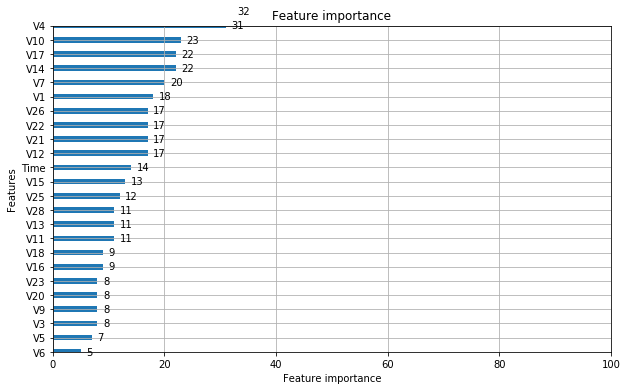

In [55]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()


In [56]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0=str(roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC without dimensionality reduction: 
0.9477672331706377


In [57]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.9994499256814484
The roc_auc_score of prediction is: 0.8818682419098309
The null acccuracy is: 0.9983146659176293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


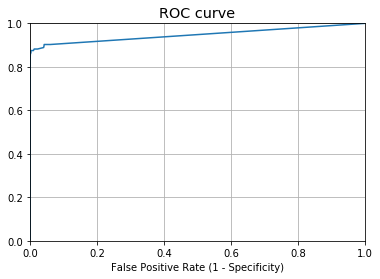

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [59]:
print(confusion_matrix(y_test, y_pred))

[[85286    13]
 [   34   110]]


In [61]:
pd.crosstab(y_test, y_pred, colnames=['Predicted'], margins=True)

Predicted,0,1,All
Class,,,
0,85286,13,85299
1,34,110,144
All,85320,123,85443


In [60]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.89      0.76      0.82       144

avg / total       1.00      1.00      1.00     85443



### Observation

There were total of 85443 transactions in test dataset. This included 85299 non fraud and 144 fraud.
- True Positive(TP) : Out of 85299 normal txns, 85286 were correctly predicted as NORMAL
- False Negative (FN) : Out of 85299 normal txns, 13 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 144 fraudulent txns, 34 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 144 fraudulent txns, 110 were correctly predicted as FRAUD. 


# Lets normalize the data and redo lightgbm classification

In [62]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
credit.Time.max(), credit.Time.min()

(172792.0, 0.0)

In [64]:
train_data = credit.drop(['Class'], axis=1)
train_predictor = credit['Class']

In [65]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [66]:
train_data = train_data - mean
train_data = train_data /std

In [67]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996580,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,...,0.326117,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781,0.244964
1,-1.996580,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607,-0.342474
2,-1.996558,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,...,0.680974,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021,1.160684
3,-1.996558,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,...,-0.269855,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188,0.140534
4,-1.996537,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,...,0.529938,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815,-0.073403


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


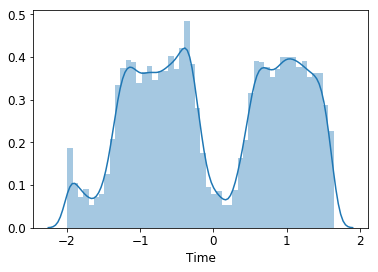

In [68]:
sns.distplot(train_data.Time)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


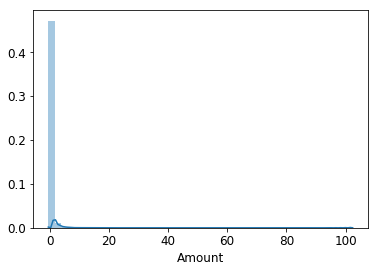

In [69]:
sns.distplot(train_data.Amount)

In [70]:
X = train_data
y = train_predictor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(199364, 30) (199364,) (85443, 30) (85443,)


In [74]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 100, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(100, 1000, 100)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2, 0.01]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 50,
        verbose=100)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.968035	valid_0's binary_logloss: 0.00311474
Did not meet early stopping. Best iteration is:
[88]	valid_0's auc: 0.968541	valid_0's binary_logloss: 0.0029221


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975532	valid_0's binary_logloss: 0.00282122
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.975598	valid_0's binary_logloss: 0.00280625


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.967921	valid_0's binary_logloss: 0.00287095
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.968079	valid_0's binary_logloss: 0.00285523


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.968035	valid_0's binary_logloss: 0.00311474
Early stopping, best iteration is:
[78]	valid_0's auc: 0.967011	valid_0's binary_logloss: 0.00282746


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975532	valid_0's binary_logloss: 0.00282122
Early stopping, best iteration is:
[80]	valid_0's auc: 0.974563	valid_0's binary_logloss: 0.0026159


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.967921	valid_0's binary_logloss: 0.00287095
Early stopping, best iteration is:
[69]	valid_0's auc: 0.955231	valid_0's binary_logloss: 0.00268341


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.968035	valid_0's binary_logloss: 0.00311474
Early stopping, best iteration is:
[78]	valid_0's auc: 0.967011	valid_0's binary_logloss: 0.00282746


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975532	valid_0's binary_logloss: 0.00282122
Early stopping, best iteration is:
[80]	valid_0's auc: 0.974563	valid_0's binary_logloss: 0.0026159


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.967921	valid_0's binary_logloss: 0.00287095
Early stopping, best iteration is:
[69]	valid_0's auc: 0.955231	valid_0's binary_logloss: 0.00268341


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.968035	valid_0's binary_logloss: 0.00311474
Early stopping, best iteration is:
[78]	valid_0's auc: 0.967011	valid_0's binary_logloss: 0.00282746


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975532	valid_0's binary_logloss: 0.00282122
Early stopping, best iteration is:
[80]	valid_0's auc: 0.974563	valid_0's binary_logloss: 0.0026159


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.967921	valid_0's binary_logloss: 0.00287095
Early stopping, best iteration is:
[69]	valid_0's auc: 0.955231	valid_0's binary_logloss: 0.00268341


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.968035	valid_0's binary_logloss: 0.00311474
Early stopping, best iteration is:
[78]	valid_0's auc: 0.967011	valid_0's binary_logloss: 0.00282746


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975532	valid_0's binary_logloss: 0.00282122
Early stopping, best iteration is:
[80]	valid_0's auc: 0.974563	valid_0's binary_logloss: 0.0026159


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.967921	valid_0's binary_logloss: 0.00287095
Early stopping, best iteration is:
[69]	valid_0's auc: 0.955231	valid_0's binary_logloss: 0.00268341


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.968035	valid_0's binary_logloss: 0.00311474
Early stopping, best iteration is:
[78]	valid_0's auc: 0.967011	valid_0's binary_logloss: 0.00282746


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975532	valid_0's binary_logloss: 0.00282122
Early stopping, best iteration is:
[80]	valid_0's auc: 0.974563	valid_0's binary_logloss: 0.0026159


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.967921	valid_0's binary_logloss: 0.00287095
Early stopping, best iteration is:
[69]	valid_0's auc: 0.955231	valid_0's binary_logloss: 0.00268341


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.968035	valid_0's binary_logloss: 0.00311474
Early stopping, best iteration is:
[78]	valid_0's auc: 0.967011	valid_0's binary_logloss: 0.00282746


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975532	valid_0's binary_logloss: 0.00282122
Early stopping, best iteration is:
[80]	valid_0's auc: 0.974563	valid_0's binary_logloss: 0.0026159


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.967921	valid_0's binary_logloss: 0.00287095
Early stopping, best iteration is:
[69]	valid_0's auc: 0.955231	valid_0's binary_logloss: 0.00268341


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.968035	valid_0's binary_logloss: 0.00311474
Early stopping, best iteration is:
[78]	valid_0's auc: 0.967011	valid_0's binary_logloss: 0.00282746


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975532	valid_0's binary_logloss: 0.00282122
Early stopping, best iteration is:
[80]	valid_0's auc: 0.974563	valid_0's binary_logloss: 0.0026159


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.967921	valid_0's binary_logloss: 0.00287095
Early stopping, best iteration is:
[69]	valid_0's auc: 0.955231	valid_0's binary_logloss: 0.00268341


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.968035	valid_0's binary_logloss: 0.00311474
Early stopping, best iteration is:
[78]	valid_0's auc: 0.967011	valid_0's binary_logloss: 0.00282746


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975532	valid_0's binary_logloss: 0.00282122
Early stopping, best iteration is:
[80]	valid_0's auc: 0.974563	valid_0's binary_logloss: 0.0026159


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.967921	valid_0's binary_logloss: 0.00287095
Early stopping, best iteration is:
[69]	valid_0's auc: 0.955231	valid_0's binary_logloss: 0.00268341


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974771	valid_0's binary_logloss: 0.00368331
Did not meet early stopping. Best iteration is:
[96]	valid_0's auc: 0.977309	valid_0's binary_logloss: 0.00358296


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97627	valid_0's binary_logloss: 0.00324495
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.976368	valid_0's binary_logloss: 0.00322157


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.976347	valid_0's binary_logloss: 0.00327478
Did not meet early stopping. Best iteration is:
[79]	valid_0's auc: 0.97858	valid_0's binary_logloss: 0.00277977


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974771	valid_0's binary_logloss: 0.00368331
Early stopping, best iteration is:
[61]	valid_0's auc: 0.955173	valid_0's binary_logloss: 0.00288615


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97627	valid_0's binary_logloss: 0.00324495
Early stopping, best iteration is:
[65]	valid_0's auc: 0.960205	valid_0's binary_logloss: 0.00264809


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.976347	valid_0's binary_logloss: 0.00327478
Early stopping, best iteration is:
[63]	valid_0's auc: 0.959235	valid_0's binary_logloss: 0.0025782


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974771	valid_0's binary_logloss: 0.00368331
Early stopping, best iteration is:
[61]	valid_0's auc: 0.955173	valid_0's binary_logloss: 0.00288615


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97627	valid_0's binary_logloss: 0.00324495
Early stopping, best iteration is:
[65]	valid_0's auc: 0.960205	valid_0's binary_logloss: 0.00264809


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.976347	valid_0's binary_logloss: 0.00327478
Early stopping, best iteration is:
[63]	valid_0's auc: 0.959235	valid_0's binary_logloss: 0.0025782


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974771	valid_0's binary_logloss: 0.00368331
Early stopping, best iteration is:
[61]	valid_0's auc: 0.955173	valid_0's binary_logloss: 0.00288615


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97627	valid_0's binary_logloss: 0.00324495
Early stopping, best iteration is:
[65]	valid_0's auc: 0.960205	valid_0's binary_logloss: 0.00264809


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.976347	valid_0's binary_logloss: 0.00327478
Early stopping, best iteration is:
[63]	valid_0's auc: 0.959235	valid_0's binary_logloss: 0.0025782


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974771	valid_0's binary_logloss: 0.00368331
Early stopping, best iteration is:
[61]	valid_0's auc: 0.955173	valid_0's binary_logloss: 0.00288615


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97627	valid_0's binary_logloss: 0.00324495
Early stopping, best iteration is:
[65]	valid_0's auc: 0.960205	valid_0's binary_logloss: 0.00264809


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.976347	valid_0's binary_logloss: 0.00327478
Early stopping, best iteration is:
[63]	valid_0's auc: 0.959235	valid_0's binary_logloss: 0.0025782


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974771	valid_0's binary_logloss: 0.00368331
Early stopping, best iteration is:
[61]	valid_0's auc: 0.955173	valid_0's binary_logloss: 0.00288615


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97627	valid_0's binary_logloss: 0.00324495
Early stopping, best iteration is:
[65]	valid_0's auc: 0.960205	valid_0's binary_logloss: 0.00264809


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.976347	valid_0's binary_logloss: 0.00327478
Early stopping, best iteration is:
[63]	valid_0's auc: 0.959235	valid_0's binary_logloss: 0.0025782


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974771	valid_0's binary_logloss: 0.00368331
Early stopping, best iteration is:
[61]	valid_0's auc: 0.955173	valid_0's binary_logloss: 0.00288615


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97627	valid_0's binary_logloss: 0.00324495
Early stopping, best iteration is:
[65]	valid_0's auc: 0.960205	valid_0's binary_logloss: 0.00264809


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.976347	valid_0's binary_logloss: 0.00327478
Early stopping, best iteration is:
[63]	valid_0's auc: 0.959235	valid_0's binary_logloss: 0.0025782


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974771	valid_0's binary_logloss: 0.00368331
Early stopping, best iteration is:
[61]	valid_0's auc: 0.955173	valid_0's binary_logloss: 0.00288615


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97627	valid_0's binary_logloss: 0.00324495
Early stopping, best iteration is:
[65]	valid_0's auc: 0.960205	valid_0's binary_logloss: 0.00264809


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.976347	valid_0's binary_logloss: 0.00327478
Early stopping, best iteration is:
[63]	valid_0's auc: 0.959235	valid_0's binary_logloss: 0.0025782


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974771	valid_0's binary_logloss: 0.00368331
Early stopping, best iteration is:
[61]	valid_0's auc: 0.955173	valid_0's binary_logloss: 0.00288615


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97627	valid_0's binary_logloss: 0.00324495
Early stopping, best iteration is:
[65]	valid_0's auc: 0.960205	valid_0's binary_logloss: 0.00264809


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.976347	valid_0's binary_logloss: 0.00327478
Early stopping, best iteration is:
[63]	valid_0's auc: 0.959235	valid_0's binary_logloss: 0.0025782


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.982171	valid_0's binary_logloss: 0.00428625
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.982998	valid_0's binary_logloss: 0.00419925


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974753	valid_0's binary_logloss: 0.00381656
Did not meet early stopping. Best iteration is:
[85]	valid_0's auc: 0.97769	valid_0's binary_logloss: 0.0034017


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975106	valid_0's binary_logloss: 0.00364613
Did not meet early stopping. Best iteration is:
[91]	valid_0's auc: 0.977688	valid_0's binary_logloss: 0.00341784


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.982171	valid_0's binary_logloss: 0.00428625
Early stopping, best iteration is:
[52]	valid_0's auc: 0.972283	valid_0's binary_logloss: 0.00293199


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974753	valid_0's binary_logloss: 0.00381656
Early stopping, best iteration is:
[53]	valid_0's auc: 0.956481	valid_0's binary_logloss: 0.002667


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975106	valid_0's binary_logloss: 0.00364613
Early stopping, best iteration is:
[51]	valid_0's auc: 0.947637	valid_0's binary_logloss: 0.00253293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.982171	valid_0's binary_logloss: 0.00428625
Early stopping, best iteration is:
[52]	valid_0's auc: 0.972283	valid_0's binary_logloss: 0.00293199


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974753	valid_0's binary_logloss: 0.00381656
Early stopping, best iteration is:
[53]	valid_0's auc: 0.956481	valid_0's binary_logloss: 0.002667


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975106	valid_0's binary_logloss: 0.00364613
Early stopping, best iteration is:
[51]	valid_0's auc: 0.947637	valid_0's binary_logloss: 0.00253293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.982171	valid_0's binary_logloss: 0.00428625
Early stopping, best iteration is:
[52]	valid_0's auc: 0.972283	valid_0's binary_logloss: 0.00293199


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974753	valid_0's binary_logloss: 0.00381656
Early stopping, best iteration is:
[53]	valid_0's auc: 0.956481	valid_0's binary_logloss: 0.002667


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975106	valid_0's binary_logloss: 0.00364613
Early stopping, best iteration is:
[51]	valid_0's auc: 0.947637	valid_0's binary_logloss: 0.00253293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.982171	valid_0's binary_logloss: 0.00428625
Early stopping, best iteration is:
[52]	valid_0's auc: 0.972283	valid_0's binary_logloss: 0.00293199


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974753	valid_0's binary_logloss: 0.00381656
Early stopping, best iteration is:
[53]	valid_0's auc: 0.956481	valid_0's binary_logloss: 0.002667


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975106	valid_0's binary_logloss: 0.00364613
Early stopping, best iteration is:
[51]	valid_0's auc: 0.947637	valid_0's binary_logloss: 0.00253293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.982171	valid_0's binary_logloss: 0.00428625
Early stopping, best iteration is:
[52]	valid_0's auc: 0.972283	valid_0's binary_logloss: 0.00293199


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974753	valid_0's binary_logloss: 0.00381656
Early stopping, best iteration is:
[53]	valid_0's auc: 0.956481	valid_0's binary_logloss: 0.002667


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975106	valid_0's binary_logloss: 0.00364613
Early stopping, best iteration is:
[51]	valid_0's auc: 0.947637	valid_0's binary_logloss: 0.00253293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.982171	valid_0's binary_logloss: 0.00428625
Early stopping, best iteration is:
[52]	valid_0's auc: 0.972283	valid_0's binary_logloss: 0.00293199


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974753	valid_0's binary_logloss: 0.00381656
Early stopping, best iteration is:
[53]	valid_0's auc: 0.956481	valid_0's binary_logloss: 0.002667


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975106	valid_0's binary_logloss: 0.00364613
Early stopping, best iteration is:
[51]	valid_0's auc: 0.947637	valid_0's binary_logloss: 0.00253293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.982171	valid_0's binary_logloss: 0.00428625
Early stopping, best iteration is:
[52]	valid_0's auc: 0.972283	valid_0's binary_logloss: 0.00293199


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974753	valid_0's binary_logloss: 0.00381656
Early stopping, best iteration is:
[53]	valid_0's auc: 0.956481	valid_0's binary_logloss: 0.002667


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975106	valid_0's binary_logloss: 0.00364613
Early stopping, best iteration is:
[51]	valid_0's auc: 0.947637	valid_0's binary_logloss: 0.00253293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.982171	valid_0's binary_logloss: 0.00428625
Early stopping, best iteration is:
[52]	valid_0's auc: 0.972283	valid_0's binary_logloss: 0.00293199


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974753	valid_0's binary_logloss: 0.00381656
Early stopping, best iteration is:
[53]	valid_0's auc: 0.956481	valid_0's binary_logloss: 0.002667


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975106	valid_0's binary_logloss: 0.00364613
Early stopping, best iteration is:
[51]	valid_0's auc: 0.947637	valid_0's binary_logloss: 0.00253293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.00294441


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.971269	valid_0's binary_logloss: 0.00270476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.95948	valid_0's binary_logloss: 0.00260591


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.00294441


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.971269	valid_0's binary_logloss: 0.00270476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.95948	valid_0's binary_logloss: 0.00260591


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.00294441


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.971269	valid_0's binary_logloss: 0.00270476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.95948	valid_0's binary_logloss: 0.00260591


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.00294441


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.971269	valid_0's binary_logloss: 0.00270476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.95948	valid_0's binary_logloss: 0.00260591


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.00294441


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.971269	valid_0's binary_logloss: 0.00270476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.95948	valid_0's binary_logloss: 0.00260591


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.00294441


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.971269	valid_0's binary_logloss: 0.00270476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.95948	valid_0's binary_logloss: 0.00260591


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.00294441


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.971269	valid_0's binary_logloss: 0.00270476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.95948	valid_0's binary_logloss: 0.00260591


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.00294441


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.971269	valid_0's binary_logloss: 0.00270476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.95948	valid_0's binary_logloss: 0.00260591


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.00294441


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.971269	valid_0's binary_logloss: 0.00270476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[44]	valid_0's auc: 0.95948	valid_0's binary_logloss: 0.00260591


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.96096	valid_0's binary_logloss: 0.0028572


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.00269982


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.974572	valid_0's binary_logloss: 0.00263922


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.96096	valid_0's binary_logloss: 0.0028572


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.00269982


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.974572	valid_0's binary_logloss: 0.00263922


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.96096	valid_0's binary_logloss: 0.0028572


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.00269982


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.974572	valid_0's binary_logloss: 0.00263922


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.96096	valid_0's binary_logloss: 0.0028572


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.00269982


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.974572	valid_0's binary_logloss: 0.00263922


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.96096	valid_0's binary_logloss: 0.0028572


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.00269982


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.974572	valid_0's binary_logloss: 0.00263922


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.96096	valid_0's binary_logloss: 0.0028572


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.00269982


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.974572	valid_0's binary_logloss: 0.00263922


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.96096	valid_0's binary_logloss: 0.0028572


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.00269982


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.974572	valid_0's binary_logloss: 0.00263922


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.96096	valid_0's binary_logloss: 0.0028572


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.00269982


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.974572	valid_0's binary_logloss: 0.00263922


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.96096	valid_0's binary_logloss: 0.0028572


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 0.980701	valid_0's binary_logloss: 0.00269982


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.974572	valid_0's binary_logloss: 0.00263922


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955925	valid_0's binary_logloss: 0.398099


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.931896	valid_0's binary_logloss: 0.203732
Did not meet early stopping. Best iteration is:
[52]	valid_0's auc: 0.932056	valid_0's binary_logloss: 0.35272


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.938152	valid_0's binary_logloss: 0.203762
Did not meet early stopping. Best iteration is:
[91]	valid_0's auc: 0.938331	valid_0's binary_logloss: 0.225134


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955925	valid_0's binary_logloss: 0.398099


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.931896	valid_0's binary_logloss: 0.203732
Early stopping, best iteration is:
[52]	valid_0's auc: 0.932056	valid_0's binary_logloss: 0.35272


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.938152	valid_0's binary_logloss: 0.203762
Early stopping, best iteration is:
[141]	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.131013


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955925	valid_0's binary_logloss: 0.398099


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.931896	valid_0's binary_logloss: 0.203732
Early stopping, best iteration is:
[52]	valid_0's auc: 0.932056	valid_0's binary_logloss: 0.35272


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.938152	valid_0's binary_logloss: 0.203762
Early stopping, best iteration is:
[141]	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.131013


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955925	valid_0's binary_logloss: 0.398099


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.931896	valid_0's binary_logloss: 0.203732
Early stopping, best iteration is:
[52]	valid_0's auc: 0.932056	valid_0's binary_logloss: 0.35272


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.938152	valid_0's binary_logloss: 0.203762
Early stopping, best iteration is:
[141]	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.131013


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955925	valid_0's binary_logloss: 0.398099


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.931896	valid_0's binary_logloss: 0.203732
Early stopping, best iteration is:
[52]	valid_0's auc: 0.932056	valid_0's binary_logloss: 0.35272


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.938152	valid_0's binary_logloss: 0.203762
Early stopping, best iteration is:
[141]	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.131013


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955925	valid_0's binary_logloss: 0.398099


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.931896	valid_0's binary_logloss: 0.203732
Early stopping, best iteration is:
[52]	valid_0's auc: 0.932056	valid_0's binary_logloss: 0.35272


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.938152	valid_0's binary_logloss: 0.203762
Early stopping, best iteration is:
[141]	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.131013


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955925	valid_0's binary_logloss: 0.398099


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.931896	valid_0's binary_logloss: 0.203732
Early stopping, best iteration is:
[52]	valid_0's auc: 0.932056	valid_0's binary_logloss: 0.35272


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.938152	valid_0's binary_logloss: 0.203762
Early stopping, best iteration is:
[141]	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.131013


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955925	valid_0's binary_logloss: 0.398099


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.931896	valid_0's binary_logloss: 0.203732
Early stopping, best iteration is:
[52]	valid_0's auc: 0.932056	valid_0's binary_logloss: 0.35272


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.938152	valid_0's binary_logloss: 0.203762
Early stopping, best iteration is:
[141]	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.131013


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955925	valid_0's binary_logloss: 0.398099


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.931896	valid_0's binary_logloss: 0.203732
Early stopping, best iteration is:
[52]	valid_0's auc: 0.932056	valid_0's binary_logloss: 0.35272


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.938152	valid_0's binary_logloss: 0.203762
Early stopping, best iteration is:
[141]	valid_0's auc: 0.944834	valid_0's binary_logloss: 0.131013


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.981245	valid_0's binary_logloss: 0.00341227
Did not meet early stopping. Best iteration is:
[70]	valid_0's auc: 0.983963	valid_0's binary_logloss: 0.00283043


GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.125, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=38, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.15, 'n_estimators': 100}


In [76]:
gbm = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 100)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=50, 
        verbose=100)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.968	valid_0's binary_logloss: 0.0027294


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.15, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [77]:
gbm = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 100, cv=10)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=50, 
        verbose=100)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.968	valid_0's binary_logloss: 0.0027294


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        cv=10, learning_rate=0.15, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

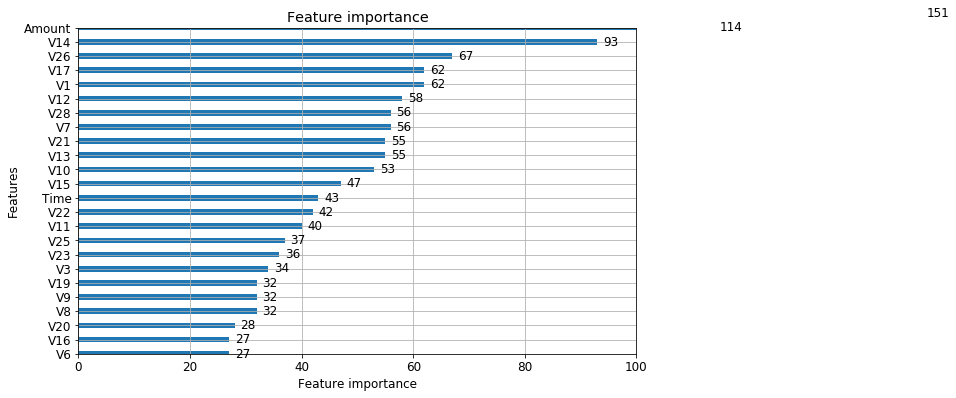

In [78]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()


In [79]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0=str(roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC without dimensionality reduction: 
0.9679996167077636


In [85]:
train_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
print(confusion_matrix(y_train, train_pred))

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[199015      1]
 [    10    338]]


In [86]:
pd.crosstab(y_train, train_pred, colnames=['Predicted'], margins=True)

Predicted,0,1,All
Class,,,
0,199015,1,199016
1,10,338,348
All,199025,339,199364


In [80]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.9995552590615966
The roc_auc_score of prediction is: 0.888853718488298
The null acccuracy is: 0.9983146659176293


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
1-(62/192)

In [150]:
pd.DataFrame(X_train.columns.tolist(), gbm.feature_importances_)

,0
43,Time
62,V1
23,V2
34,V3
151,V4
21,V5
27,V6
56,V7
32,V8
32,V9


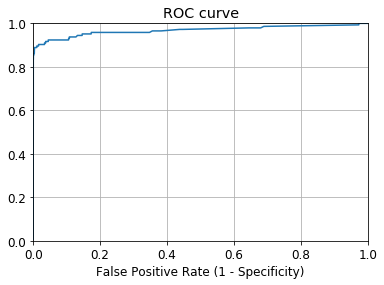

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [82]:
print(confusion_matrix(y_test, y_pred))

[[85293     6]
 [   32   112]]


In [84]:
pd.crosstab(y_test, y_pred, colnames=['Predicted'], margins=True)

Predicted,0,1,All
Class,,,
0,85293,6,85299
1,32,112,144
All,85325,118,85443


In [83]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.95      0.78      0.85       144

avg / total       1.00      1.00      1.00     85443



### Observation

#### FOR TEST DATA
There were total of 85443 transactions in test dataset. This included 85299 non fraud and 144 fraud.
- True Positive(TP) : Out of 85299 normal txns, 85293 were correctly predicted as NORMAL
- False Negative (FN) : Out of 85299 normal txns, 6 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 144 fraudulent txns, 32 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 144 fraudulent txns, 112 were correctly predicted as FRAUD. 

#### FOR TRAIN DATA
(348, 199016
199364
There were total of 199364 transactions in test dataset. This included 199016 non fraud and 348 fraud.
- True Positive(TP) : Out of 199016 normal txns, 199015 were correctly predicted as NORMAL
- False Negative (FN) : Out of 199016 normal txns, 1 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 348 fraudulent txns, 10 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 348 fraudulent txns, 338 were correctly predicted as FRAUD. 

# Training and testing with only important features

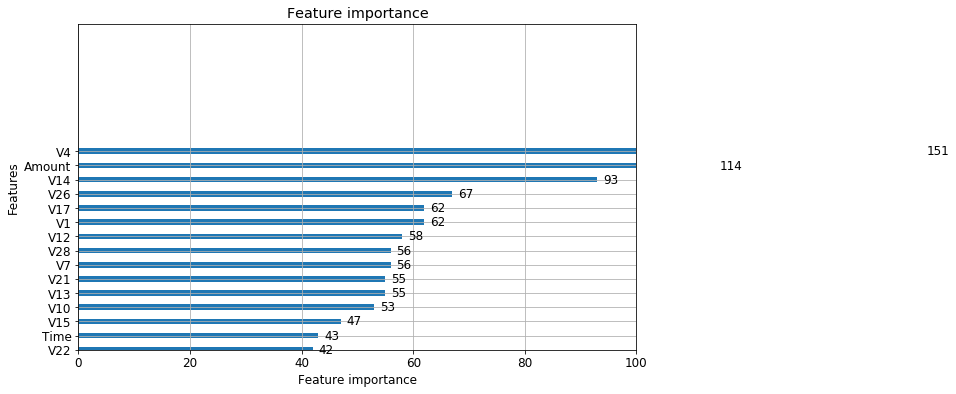

In [87]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 15, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [88]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(199364, 30) (199364,) (85443, 30) (85443,)


In [93]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(348, 199016, 0.0017455508517084327, 0.9982544491482915)

In [94]:
len(y_test[y_test == 1]), len(y_test[y_test == 0]), len(y_test[y_test == 1])/len(y_test), len(y_test[y_test == 0])/len(y_test)

(144, 85299, 0.0016853340823707033, 0.9983146659176293)

In [117]:
dtrain.data.shape

(199364, 30)

In [125]:
# Reference 
def get_feature_importances(X_raw, y_raw, shuffle, seed=None):
    
    # Shuffle target if required
    y_target = y_raw.copy()
    if shuffle:
        # Here you could as well use a binomial distribution
        y_target = y_raw.copy().sample(frac=1.0)
        
    # Fit LightGBM in RF mode
    X_lgb = lgb.Dataset(X_raw, y_target, free_raw_data=False, silent=True)
    lgb_params = {
            'objective': 'binary',
            'boosting_type': 'rf',
            'subsample': 0.623,
            'colsample_bytree': 0.7,
            'num_leaves': 127,
            'max_depth': 8,
            'seed': None,
            'bagging_freq': 1,
            'n_jobs': 4
        }
    # Fit the model
    lgb_clf = lgb.train(params=lgb_params, train_set=X_lgb, num_boost_round=200)
    
    lgb_pred = lgb_clf.predict(X_raw)
    
    # Get feature importances
    feat_impt = pd.DataFrame()
    feat_impt["feature"] = X_train.columns.tolist()
    feat_impt["importance_gain"] = lgb_clf.feature_importance(importance_type='gain')
    feat_impt["importance_split"] = lgb_clf.feature_importance(importance_type='split')
    feat_impt['trn_score'] = roc_auc_score(y_target, lgb_pred)
    
    return feat_impt

In [146]:
len(lgb_clf.feature_importance(importance_type='split'))

30

In [127]:
np.random.seed(123)
benchmark_feat_impt = get_feature_importances(X_train, y_train, shuffle=False)

In [128]:
benchmark_feat_impt.sort_values(by='importance_gain', ascending=False)

,feature,importance_gain,importance_split,trn_score
10,V10,39168.069326,395,0.99754
14,V14,34702.924248,423,0.99754
12,V12,17276.481362,400,0.99754
7,V7,10993.829784,424,0.99754
17,V17,5067.096208,389,0.99754
26,V26,3216.058804,463,0.99754
16,V16,2123.238941,214,0.99754
11,V11,1476.252506,150,0.99754
0,Time,1179.623962,359,0.99754
3,V3,1138.017468,194,0.99754


# NULL Importances Distribution

In [130]:
null_imp_df = pd.DataFrame()
nb_runs = 80
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    imp_df = get_feature_importances(X_train, y_train, shuffle=True)
    imp_df['run'] = i + 1 
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp, end='', flush=True)

Done with    1 of   80 (Spent   0.2 min)Done with    2 of   80 (Spent   0.4 min)Done with    3 of   80 (Spent   0.7 min)Done with    4 of   80 (Spent   0.9 min)Done with    5 of   80 (Spent   1.1 min)Done with    6 of   80 (Spent   1.3 min)Done with    7 of   80 (Spent   1.6 min)Done with    8 of   80 (Spent   1.9 min)Done with    9 of   80 (Spent   2.2 min)Done with   10 of   80 (Spent   2.4 min)Done with   11 of   80 (Spent   2.6 min)Done with   12 of   80 (Spent   2.9 min)Done with   13 of   80 (Spent   3.2 min)

In [134]:
null_imp_df.sort_values(by='importance_gain', ascending=False).head(10)

,feature,importance_gain,importance_split,trn_score,run
0,Time,217.446890,905,0.975268,33
0,Time,208.712904,883,0.959975,65
0,Time,206.419938,949,0.973313,10
1,V1,204.310670,786,0.983712,62
0,Time,203.157934,779,0.973805,29
0,Time,202.958439,786,0.977580,66
0,Time,200.252421,767,0.969805,36
13,V13,200.141787,816,0.983712,62
1,V1,196.074900,824,0.971742,75
0,Time,195.672178,773,0.966648,45


In [142]:
null_imp_df.sort_values(by='importance_split', ascending=False).tail()

,feature,importance_gain,importance_split,trn_score,run
28,V28,49.749394,184,0.950501,15
21,V21,51.012194,183,0.963294,79
20,V20,51.919657,174,0.970105,16
27,V27,42.243695,167,0.963294,79
21,V21,48.551611,161,0.957220,34


In [136]:
def display_distributions(actual_imp_df_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)
    # Plot Split importances
    ax = plt.subplot(gs[0, 0])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_split'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_split'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Split Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (split) Distribution for %s ' % feature_.upper())
    # Plot Gain importances
    ax = plt.subplot(gs[0, 1])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Gain Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())
        

In [138]:
import matplotlib.gridspec as gridspec

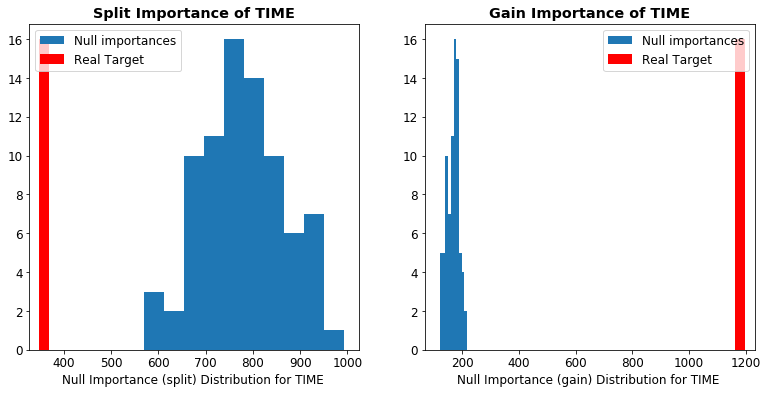

In [139]:
display_distributions(benchmark_feat_impt, null_imp_df, 'Time' )

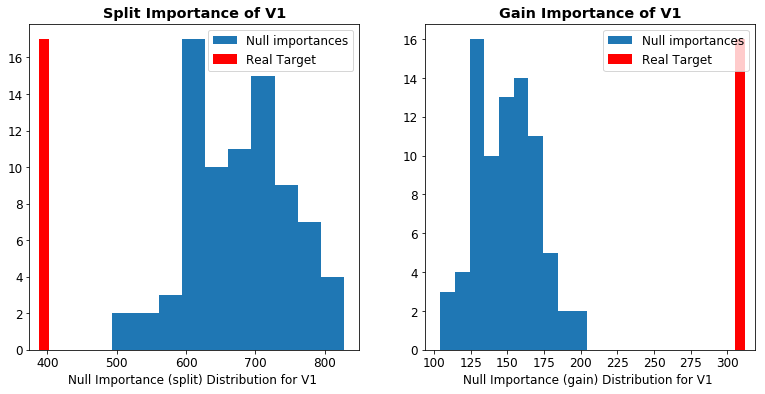

In [141]:
display_distributions(benchmark_feat_impt, null_imp_df, 'V1' )

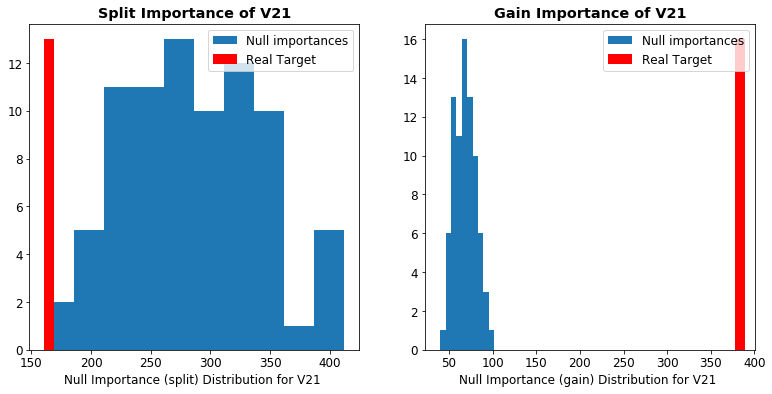

In [143]:
display_distributions(benchmark_feat_impt, null_imp_df, 'V21' )